In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)
warnings.filterwarnings("ignore", category = FutureWarning)
warnings.filterwarnings("ignore", category = UserWarning)

# preprocessing
import re
import string 
import itertools # for flattening

# nltk library
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize, RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk import FreqDist
from wordcloud import WordCloud
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.util import ngrams
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder 
from nltk.util import ngrams

from wordcloud import WordCloud

nltk.download('punkt', quiet=True)
nltk.download('stopwords')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

# sklearn library 
from sklearn.model_selection import train_test_split
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.manifold import TSNE
from sklearn.decomposition import NMF
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, plot_roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve, RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer


from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import pyLDAvis.sklearn

import pickle

import prince

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jocel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\jocel\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\jocel\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jocel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\jocel\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
C:\Users\jocel\anaconda3\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's docu

In [2]:
# reading fallout 3 pickle file

fallout3_df = pd.read_pickle("fallout3_df.pkl")
fallout3_df

,recommendationid,author,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,hidden_in_steam_china,steam_china_location
0,131869610,"{'steamid': '76561199093429889', 'num_games_ow...",spanish,Excelente juego.,1675085335,1675085335,True,0,0,0,0,False,False,False,True,
1,131840023,"{'steamid': '76561198274686747', 'num_games_ow...",english,The best game of all time. Don't believe me? P...,1675038034,1675038034,True,0,0,0,0,False,False,False,True,
2,131775968,"{'steamid': '76561198330235225', 'num_games_ow...",english,i like that it is an open world game that you ...,1674966653,1674966653,True,0,0,0,0,True,False,False,True,
3,131731950,"{'steamid': '76561199165748096', 'num_games_ow...",english,"I fucking love this game, its one of my childh...",1674919157,1674919157,True,0,0,0,0,False,False,False,True,
4,131701621,"{'steamid': '76561198213474099', 'num_games_ow...",english,All time great!,1674884430,1674884430,True,0,0,0,0,True,False,False,True,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,668087,"{'steamid': '76561197974873880', 'num_games_ow...",english,"RPG of the year, one of the best.",1290240675,1290240675,True,0,0,0,0,True,False,False,False,
17962,342975,"{'steamid': '76561197969185804', 'num_games_ow...",english,"recent, beau et fun quand meme, meme si ce n'e...",1290197601,1290197601,True,0,0,0,0,False,False,False,False,
17963,323113,"{'steamid': '76561197968593024', 'num_games_ow...",english,"Great FPS/RPG with non-linear gameplay, huge o...",1290191053,1385409267,True,0,0,0,0,False,False,False,False,
17964,942919,"{'steamid': '76561197982681995', 'num_games_ow...",english,The best part of the game is off the beaten pa...,1287542096,1385412538,True,0,0,0,0,True,False,False,False,


In [3]:
# reading fallout 3 goty pickle file 

fallout3_goty_df = pd.read_pickle("fallout3_goty_df.pkl")
fallout3_goty_df

,recommendationid,author,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,hidden_in_steam_china,steam_china_location
0,131859880,"{'steamid': '76561198101119780', 'num_games_ow...",english,would be great if i could play it,1675070551,1675070551,False,0,0,0,0,True,False,False,True,
1,131855221,"{'steamid': '76561198414536948', 'num_games_ow...",french,Un jeu top top top !\nMerci Bethesda !,1675062663,1675062663,True,0,0,0,0,False,False,False,True,
2,131852248,"{'steamid': '76561199114521611', 'num_games_ow...",english,This is the best game Fallout game i ever play...,1675057289,1675057289,True,0,0,0,0,True,False,False,True,
3,131851056,"{'steamid': '76561198282884527', 'num_games_ow...",english,if you you like words and perfectly understand...,1675055300,1675055794,True,0,1,0,0,True,False,False,True,
4,131849781,"{'steamid': '76561199110657479', 'num_games_ow...",english,Good game if your machine can run it. Mine can't,1675053112,1675053112,True,0,0,0,0,True,False,False,True,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19494,47953954,"{'steamid': '76561198038579656', 'num_games_ow...",russian,"Игрушка очень впечатляет) Атмосфера, графика, ...",1546170659,1546170659,True,0,0,0,0,True,False,False,False,
19495,47950695,"{'steamid': '76561198079413178', 'num_games_ow...",english,7/10,1546160985,1546160985,True,0,1,0.438300758600234985,0,True,False,False,False,
19496,47947720,"{'steamid': '76561198213349023', 'num_games_ow...",english,I'm not going to go into depth about how this ...,1546150852,1546150852,True,2,0,0.52173912525177002,0,True,False,False,False,
19497,47946583,"{'steamid': '76561198151845107', 'num_games_ow...",russian,[b]Один скажет:[/b] [h1]ПРИВЕТ[/h1]\n[b]Миллио...,1546147170,1546147170,True,31,17,0.621355116367340088,4,True,False,False,False,


In [4]:
# reading fallout 4 pickle file

fallout4_df = pd.read_pickle("fallout4_df.pkl")
fallout4_df

,recommendationid,author,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,hidden_in_steam_china,steam_china_location
0,131869596,"{'steamid': '76561198192323321', 'num_games_ow...",english,"fallout + ibuprofen, try my recipe.",1675085311,1675085311,True,0,0,0,0,True,False,False,True,
1,131868427,"{'steamid': '76561199152161988', 'num_games_ow...",english,i mean its ok mods are fun\n,1675083772,1675083772,True,0,0,0,0,True,False,False,True,
2,131868150,"{'steamid': '76561199068760027', 'num_games_ow...",schinese,一款好游戏，但不是一款好辐射\n但对新手友善\n挺易上手,1675083388,1675083388,True,0,0,0,0,True,False,False,True,
3,131867209,"{'steamid': '76561199055352893', 'num_games_ow...",brazilian,nao e melhor que fallout new vegas e o 3 ou at...,1675082149,1675082149,True,0,0,0,0,True,False,False,True,
4,131866936,"{'steamid': '76561198804370013', 'num_games_ow...",english,loading takes so long that it might take almos...,1675081755,1675081755,False,0,0,0,0,True,False,False,True,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87494,80901264,"{'steamid': '76561198097749509', 'num_games_ow...",english,"Not a great fallout game, but its Minecraft wi...",1606583808,1606583808,True,0,0,0,0,True,False,False,False,
87495,80900869,"{'steamid': '76561198079386093', 'num_games_ow...",english,"So much to do, see and explore in this very de...",1606583674,1606583863,True,0,0,0,0,False,False,False,False,
87496,80900738,"{'steamid': '76561199017541192', 'num_games_ow...",english,its great but don't delete your save like i di...,1606583628,1606583628,True,1,0,0.523809552192687988,0,True,False,False,False,
87497,80900166,"{'steamid': '76561198447753145', 'num_games_ow...",english,yes\n,1606583435,1606583435,True,0,0,0,0,True,False,False,False,


In [5]:
# reading fallout 76 pickle file 

fallout76_df = pd.read_pickle("fallout76_df.pkl")
fallout76_df

,recommendationid,author,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,hidden_in_steam_china,steam_china_location,timestamp_dev_responded,developer_response
0,131873216,"{'steamid': '76561199386811559', 'num_games_ow...",schinese,一直卡在登录，谢谢你76,1675089523,1675089523,True,0,0,0,0,True,False,False,True,,NaN,NaN
1,131871410,"{'steamid': '76561198026220512', 'num_games_ow...",english,Horrible server issues. Game gets patched and ...,1675087415,1675087415,False,1,0,0,0,True,False,False,True,,NaN,NaN
2,131870128,"{'steamid': '76561198212538333', 'num_games_ow...",english,i really like this game its very best game,1675085989,1675085989,True,0,0,0,0,False,False,False,True,,NaN,NaN
3,131869816,"{'steamid': '76561198268833112', 'num_games_ow...",schinese,没有梯子不配玩你b社游戏是不,1675085589,1675085987,False,1,0,0,0,False,False,False,True,,NaN,NaN
4,131867821,"{'steamid': '76561198014432337', 'num_games_ow...",russian,Плохо что мало беспредела с нападением на игро...,1675082972,1675082972,True,0,0,0,0,True,False,False,True,,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44294,81223704,"{'steamid': '76561198089495354', 'num_games_ow...",russian,Вест вирджиния маунтин мама.,1606745281,1606745281,True,2,1,0.523265659809112549,0,False,False,False,False,,NaN,NaN
44295,81223484,"{'steamid': '76561198046103466', 'num_games_ow...",tchinese,連線品質不穩定，但還算佳作,1606745187,1606745187,True,0,0,0,0,True,False,False,False,,NaN,NaN
44296,81223334,"{'steamid': '76561198420754027', 'num_games_ow...",english,less whack,1606745113,1662926831,True,0,0,0.476190477609634399,0,True,False,False,False,,NaN,NaN
44297,81222353,"{'steamid': '76561198038262659', 'num_games_ow...",russian,War Never Changes,1606744679,1606744679,True,0,0,0.499405473470687866,0,True,False,False,False,,NaN,NaN


In [6]:
# dropping timestamp_dev_responded and developer response since it only contains 962 non-null values

fallout76_df = fallout76_df.drop(["timestamp_dev_responded", "developer_response"], axis = 1)

In [7]:
fallout76_df

,recommendationid,author,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,hidden_in_steam_china,steam_china_location
0,131873216,"{'steamid': '76561199386811559', 'num_games_ow...",schinese,一直卡在登录，谢谢你76,1675089523,1675089523,True,0,0,0,0,True,False,False,True,
1,131871410,"{'steamid': '76561198026220512', 'num_games_ow...",english,Horrible server issues. Game gets patched and ...,1675087415,1675087415,False,1,0,0,0,True,False,False,True,
2,131870128,"{'steamid': '76561198212538333', 'num_games_ow...",english,i really like this game its very best game,1675085989,1675085989,True,0,0,0,0,False,False,False,True,
3,131869816,"{'steamid': '76561198268833112', 'num_games_ow...",schinese,没有梯子不配玩你b社游戏是不,1675085589,1675085987,False,1,0,0,0,False,False,False,True,
4,131867821,"{'steamid': '76561198014432337', 'num_games_ow...",russian,Плохо что мало беспредела с нападением на игро...,1675082972,1675082972,True,0,0,0,0,True,False,False,True,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44294,81223704,"{'steamid': '76561198089495354', 'num_games_ow...",russian,Вест вирджиния маунтин мама.,1606745281,1606745281,True,2,1,0.523265659809112549,0,False,False,False,False,
44295,81223484,"{'steamid': '76561198046103466', 'num_games_ow...",tchinese,連線品質不穩定，但還算佳作,1606745187,1606745187,True,0,0,0,0,True,False,False,False,
44296,81223334,"{'steamid': '76561198420754027', 'num_games_ow...",english,less whack,1606745113,1662926831,True,0,0,0.476190477609634399,0,True,False,False,False,
44297,81222353,"{'steamid': '76561198038262659', 'num_games_ow...",russian,War Never Changes,1606744679,1606744679,True,0,0,0.499405473470687866,0,True,False,False,False,


In [8]:
# reading fallout new vegas pickle file 

falloutNV_df = pd.read_pickle("falloutNV_df.pkl")
falloutNV_df

,recommendationid,author,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,hidden_in_steam_china,steam_china_location
0,131860607,"{'steamid': '76561199182441841', 'num_games_ow...",english,legion sucks,1675071840,1675071840,True,0,0,0.476190477609634399,0,True,False,False,True,
1,131860351,"{'steamid': '76561198824317187', 'num_games_ow...",english,very fun game,1675071391,1675071391,True,0,0,0,0,True,False,False,True,
2,131857518,"{'steamid': '76561198143817113', 'num_games_ow...",latam,"Graficamente es lo peor que he visto, pero el ...",1675066806,1675066806,True,0,0,0,0,True,False,False,True,
3,131857210,"{'steamid': '76561199080631340', 'num_games_ow...",english,Hi im Ricky Bobby and if you dont play new ve...,1675066227,1675066227,True,0,0,0,0,True,False,False,True,
4,131856549,"{'steamid': '76561198121608041', 'num_games_ow...",english,play this if you want to experience a true sto...,1675065063,1675065063,True,0,0,0,0,True,False,False,True,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93794,60341818,"{'steamid': '76561198331743288', 'num_games_ow...",english,This Game is really Fun for People who like Po...,1577045581,1604870663,True,1,0,0,0,True,False,False,False,
93795,60341351,"{'steamid': '76561198418430608', 'num_games_ow...",english,TIT\n,1577045145,1577045145,True,0,0,0,0,True,False,False,False,
93796,60339980,"{'steamid': '76561198161559948', 'num_games_ow...",english,"My favorite game of all time, hands down",1577043711,1577043711,True,0,1,0,0,True,False,False,False,
93797,60337307,"{'steamid': '76561198099478776', 'num_games_ow...",english,Its a fookin banger m8,1577041023,1577041023,True,1,0,0,2,True,False,False,False,


In [9]:
# reading fallout shelter pickle file

falloutS_df = pd.read_pickle("falloutS_df.pkl")
falloutS_df

,recommendationid,author,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,hidden_in_steam_china,steam_china_location
0,131869733,"{'steamid': '76561199402685960', 'num_games_ow...",schinese,个人认为辐射 避难所的玩法并不新，但是游戏内角色机制的设置较为合理，低配也可以过难关，而且肝...,1675085490,1675085490,True,0,0,0,0,False,False,False,True,
1,131868708,"{'steamid': '76561199076674519', 'num_games_ow...",russian,Нет,1675084164,1675084164,True,0,0,0,0,False,False,False,True,
2,131863448,"{'steamid': '76561198992306293', 'num_games_ow...",russian,Норм я проиграл но все равно норм,1675076596,1675076596,True,0,0,0,0,False,False,False,True,
3,131858338,"{'steamid': '76561198055094309', 'num_games_ow...",russian,"Хорошая игра. Иногда зайти, что то сделать и п...",1675068190,1675068190,True,0,0,0,0,False,False,False,True,
4,131855620,"{'steamid': '76561199407314568', 'num_games_ow...",schinese,好玩休闲的时候来一下诶嘿就很舒服,1675063413,1675063413,True,0,0,0,0,False,False,False,True,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56072,30814079,"{'steamid': '76561198094714000', 'num_games_ow...",schinese,终于出在steam上了，感谢各位提醒~好评~,1490796742,1491148479,True,20,6,0.739851236343383789,7,False,False,False,False,
56073,30814067,"{'steamid': '76561198048801719', 'num_games_ow...",koreana,나오자 마자 다운 받고선 실행을 해보니 실행이 되질 않았다.\n\n폴더를 확인해보니...,1490796709,1490796709,True,7,22,0.369966328144073486,0,False,False,False,False,
56074,30814014,"{'steamid': '76561198030086276', 'num_games_ow...",russian,Toad Guvert - Ге(ни)й!,1490796525,1490796525,True,4,3,0.475161999464035034,1,False,False,False,False,
56075,30813605,"{'steamid': '76561198069159901', 'num_games_ow...",russian,"Разрабам отдельный респект за то, что сделали ...",1490795260,1490801645,True,10,0,0.466816484928131104,4,False,False,False,False,


In [10]:
# concatenating all the dataframes vertically 

pd.set_option('display.max_colwidth', None)
df = pd.concat([fallout3_df, fallout3_goty_df, fallout4_df, fallout76_df, falloutNV_df, falloutS_df], axis=0)
df.head()

,recommendationid,author,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,hidden_in_steam_china,steam_china_location
0,131869610,"{'steamid': '76561199093429889', 'num_games_owned': 6, 'num_reviews': 1, 'playtime_forever': 294, 'playtime_last_two_weeks': 294, 'playtime_at_review': 277, 'last_played': 1675086390}",spanish,Excelente juego.,1675085335,1675085335,True,0,0,0,0,False,False,False,True,
1,131840023,"{'steamid': '76561198274686747', 'num_games_owned': 236, 'num_reviews': 22, 'playtime_forever': 5650, 'playtime_last_two_weeks': 0, 'playtime_at_review': 5650, 'last_played': 1582798285}",english,The best game of all time. Don't believe me? Play it and find out yourself!,1675038034,1675038034,True,0,0,0,0,False,False,False,True,
2,131775968,"{'steamid': '76561198330235225', 'num_games_owned': 78, 'num_reviews': 2, 'playtime_forever': 2087, 'playtime_last_two_weeks': 1681, 'playtime_at_review': 1855, 'last_played': 1675042118}",english,i like that it is an open world game that you can for days,1674966653,1674966653,True,0,0,0,0,True,False,False,True,
3,131731950,"{'steamid': '76561199165748096', 'num_games_owned': 33, 'num_reviews': 5, 'playtime_forever': 523, 'playtime_last_two_weeks': 518, 'playtime_at_review': 407, 'last_played': 1675017324}",english,"I fucking love this game, its one of my childhood games and one of my favourite games. Although fallout 4 is gameplay wise more fun with smoother combat, and personally I like the building and crafting system, but Fallout 3 has a better story in my opinion. Definitely get it, its a blast to play.",1674919157,1674919157,True,0,0,0,0,False,False,False,True,
4,131701621,"{'steamid': '76561198213474099', 'num_games_owned': 38, 'num_reviews': 2, 'playtime_forever': 1142, 'playtime_last_two_weeks': 671, 'playtime_at_review': 954, 'last_played': 1674982474}",english,All time great!,1674884430,1674884430,True,0,0,0,0,True,False,False,True,


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319139 entries, 0 to 56076
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   recommendationid             319139 non-null  object
 1   author                       319139 non-null  object
 2   language                     319139 non-null  object
 3   review                       319139 non-null  object
 4   timestamp_created            319139 non-null  int64 
 5   timestamp_updated            319139 non-null  int64 
 6   voted_up                     319139 non-null  bool  
 7   votes_up                     319139 non-null  int64 
 8   votes_funny                  319139 non-null  int64 
 9   weighted_vote_score          319139 non-null  object
 10  comment_count                319139 non-null  int64 
 11  steam_purchase               319139 non-null  bool  
 12  received_for_free            319139 non-null  bool  
 13  written_during_

In [12]:
df

,recommendationid,author,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,hidden_in_steam_china,steam_china_location
0,131869610,"{'steamid': '76561199093429889', 'num_games_owned': 6, 'num_reviews': 1, 'playtime_forever': 294, 'playtime_last_two_weeks': 294, 'playtime_at_review': 277, 'last_played': 1675086390}",spanish,Excelente juego.,1675085335,1675085335,True,0,0,0,0,False,False,False,True,
1,131840023,"{'steamid': '76561198274686747', 'num_games_owned': 236, 'num_reviews': 22, 'playtime_forever': 5650, 'playtime_last_two_weeks': 0, 'playtime_at_review': 5650, 'last_played': 1582798285}",english,The best game of all time. Don't believe me? Play it and find out yourself!,1675038034,1675038034,True,0,0,0,0,False,False,False,True,
2,131775968,"{'steamid': '76561198330235225', 'num_games_owned': 78, 'num_reviews': 2, 'playtime_forever': 2087, 'playtime_last_two_weeks': 1681, 'playtime_at_review': 1855, 'last_played': 1675042118}",english,i like that it is an open world game that you can for days,1674966653,1674966653,True,0,0,0,0,True,False,False,True,
3,131731950,"{'steamid': '76561199165748096', 'num_games_owned': 33, 'num_reviews': 5, 'playtime_forever': 523, 'playtime_last_two_weeks': 518, 'playtime_at_review': 407, 'last_played': 1675017324}",english,"I fucking love this game, its one of my childhood games and one of my favourite games. Although fallout 4 is gameplay wise more fun with smoother combat, and personally I like the building and crafting system, but Fallout 3 has a better story in my opinion. Definitely get it, its a blast to play.",1674919157,1674919157,True,0,0,0,0,False,False,False,True,
4,131701621,"{'steamid': '76561198213474099', 'num_games_owned': 38, 'num_reviews': 2, 'playtime_forever': 1142, 'playtime_last_two_weeks': 671, 'playtime_at_review': 954, 'last_played': 1674982474}",english,All time great!,1674884430,1674884430,True,0,0,0,0,True,False,False,True,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56072,30814079,"{'steamid': '76561198094714000', 'num_games_owned': 655, 'num_reviews': 25, 'playtime_forever': 239, 'playtime_last_two_weeks': 0, 'playtime_at_review': 10, 'last_played': 1499835699}",schinese,终于出在steam上了，感谢各位提醒~好评~,1490796742,1491148479,True,20,6,0.739851236343383789,7,False,False,False,False,
56073,30814067,"{'steamid': '76561198048801719', 'num_games_owned': 6799, 'num_reviews': 17, 'playtime_forever': 4237, 'playtime_last_two_weeks': 0, 'playtime_at_review': 444, 'last_played': 1664523646}",koreana,"나오자 마자 다운 받고선 실행을 해보니 실행이 되질 않았다.\n\n폴더를 확인해보니 실행파일이 없었다.\n\n""아! 게임을 할려면 실행파일 DLC를 사야 하는구나..."" 라고 생각했다.",1490796709,1490796709,True,7,22,0.369966328144073486,0,False,False,False,False,
56074,30814014,"{'steamid': '76561198030086276', 'num_games_owned': 107, 'num_reviews': 4, 'playtime_forever': 123, 'playtime_last_two_weeks': 0, 'playtime_at_review': 117, 'last_played': 1507837266}",russian,Toad Guvert - Ге(ни)й!,1490796525,1490796525,True,4,3,0.475161999464035034,1,False,False,False,False,
56075,30813605,"{'steamid': '76561198069159901', 'num_games_owned': 479, 'num_reviews': 128, 'playtime_forever': 367, 'playtime_last_two_weeks': 0, 'playtime_at_review': 367, 'last_played': 1491095295}",russian,"Разрабам отдельный респект за то, что сделали её условно-беслпатной. Донатить в эту игру нет необходимости, так что можно считать это бесплатным подарком от беседки.\n\nP.S у кого не запускается игра, проверьте целостность кэша.",1490795260,1490801645,True,10,0,0.466816484928131104,4,False,False,False,False,


In [13]:
language = df["language"].value_counts(normalize = True).reset_index()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


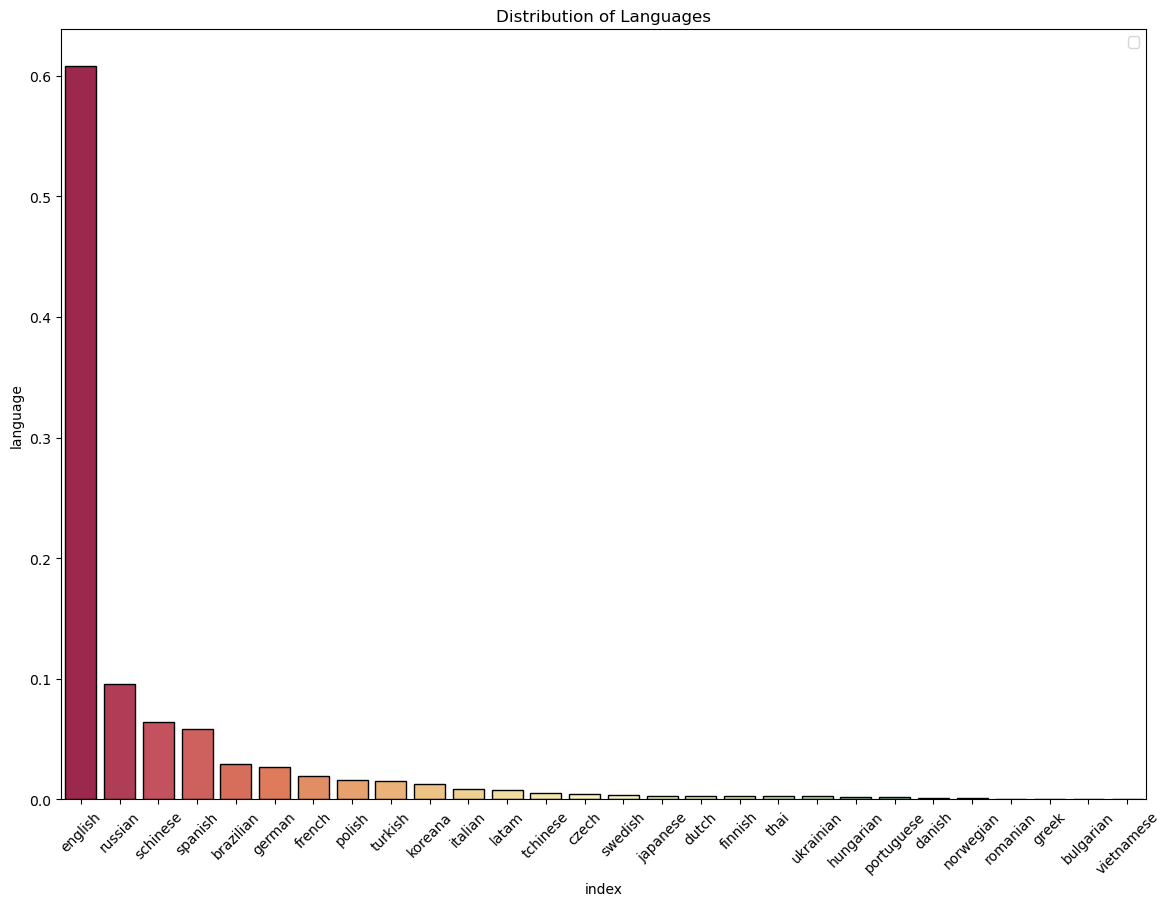

In [14]:
# plotting distribution of languages

fig, ax = plt.subplots(figsize = (14, 10))
sns.barplot(data = language, x = "index", y = "language", edgecolor = "black", palette = "Spectral")
plt.title("Distribution of Languages")
plt.xticks(rotation = 45)
plt.legend()
plt.show();

Around 60% of the language used is in English and since it's a significant amount, I plan to just drop all non-english languages

In [15]:
# dropping all non-english language and keeping only english 

new_df = df.loc[df["language"] == "english"]

In [16]:
new_df = new_df.reset_index()

In [17]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194035 entries, 0 to 194034
Data columns (total 17 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   index                        194035 non-null  int64 
 1   recommendationid             194035 non-null  object
 2   author                       194035 non-null  object
 3   language                     194035 non-null  object
 4   review                       194035 non-null  object
 5   timestamp_created            194035 non-null  int64 
 6   timestamp_updated            194035 non-null  int64 
 7   voted_up                     194035 non-null  bool  
 8   votes_up                     194035 non-null  int64 
 9   votes_funny                  194035 non-null  int64 
 10  weighted_vote_score          194035 non-null  object
 11  comment_count                194035 non-null  int64 
 12  steam_purchase               194035 non-null  bool  
 13  received_for_f

In [18]:
new_df = new_df.drop("index", axis = 1)

In [19]:
# normalizing author column 

norm_df = pd.json_normalize(new_df["author"])

In [20]:
norm_df

,steamid,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,playtime_at_review,last_played
0,76561198274686747,236,22,5650,0,5650.0,1582798285
1,76561198330235225,78,2,2087,1681,1855.0,1675042118
2,76561199165748096,33,5,523,518,407.0,1675017324
3,76561198213474099,38,2,1142,671,954.0,1674982474
4,76561198166525195,69,13,266,48,266.0,1674874053
...,...,...,...,...,...,...,...
194030,76561197974942528,343,7,3710,0,30.0,1508241098
194031,76561198144517958,168,27,971,0,12.0,1558766521
194032,76561198160969677,440,19,66,0,66.0,1490800262
194033,76561198028220390,197,12,1217,0,845.0,1604317878


In [21]:
# combining json normalized dataframe with original dataframe

final_df = pd.concat([norm_df, new_df], axis=1)

In [22]:
# dropping author column 

final_df = final_df.drop("author", axis = 1)

In [23]:
final_df.isna().sum()

steamid                         0
num_games_owned                 0
num_reviews                     0
playtime_forever                0
playtime_last_two_weeks         0
playtime_at_review             34
last_played                     0
recommendationid                0
language                        0
review                          0
timestamp_created               0
timestamp_updated               0
voted_up                        0
votes_up                        0
votes_funny                     0
weighted_vote_score             0
comment_count                   0
steam_purchase                  0
received_for_free               0
written_during_early_access     0
hidden_in_steam_china           0
steam_china_location            0
dtype: int64

In [24]:
# finding nan values 

final_df["playtime_at_review"].isna().value_counts()

False    194001
True         34
Name: playtime_at_review, dtype: int64

In [25]:
# dropping nans

final_df.dropna()

,steamid,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,playtime_at_review,last_played,recommendationid,language,review,...,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,hidden_in_steam_china,steam_china_location
0,76561198274686747,236,22,5650,0,5650.0,1582798285,131840023,english,The best game of all time. Don't believe me? Play it and find out yourself!,...,True,0,0,0,0,False,False,False,True,
1,76561198330235225,78,2,2087,1681,1855.0,1675042118,131775968,english,i like that it is an open world game that you can for days,...,True,0,0,0,0,True,False,False,True,
2,76561199165748096,33,5,523,518,407.0,1675017324,131731950,english,"I fucking love this game, its one of my childhood games and one of my favourite games. Although fallout 4 is gameplay wise more fun with smoother combat, and personally I like the building and crafting system, but Fallout 3 has a better story in my opinion. Definitely get it, its a blast to play.",...,True,0,0,0,0,False,False,False,True,
3,76561198213474099,38,2,1142,671,954.0,1674982474,131701621,english,All time great!,...,True,0,0,0,0,True,False,False,True,
4,76561198166525195,69,13,266,48,266.0,1674874053,131699383,english,Uras,...,True,0,0,0,0,True,False,False,True,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194030,76561197974942528,343,7,3710,0,30.0,1508241098,30814491,english,Loved this game when on ios platform. happy to play it again,...,True,7,2,0.398307830095291138,0,False,False,False,False,
194031,76561198144517958,168,27,971,0,12.0,1558766521,30814470,english,"Named my first vault vault 69, the other vault 420\nafter I gave everyone ghetto names\nthen I stopped playing",...,True,6,34,0.277916163206100464,0,False,False,False,False,
194032,76561198160969677,440,19,66,0,66.0,1490800262,30814436,english,A F2P pile of shit that is laced in microtransactions that doesn't belong on Steam. We do not need these shit mobile ports. Stop releasing them!,...,False,44,3,0.290691971778869629,16,False,False,False,False,
194033,76561198028220390,197,12,1217,0,845.0,1604317878,30814411,english,Finally! Now I can put my nvidia geforce gtx 1060 to good use!,...,True,1,5,0,0,False,False,False,False,


In [26]:
final_df

,steamid,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,playtime_at_review,last_played,recommendationid,language,review,...,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,hidden_in_steam_china,steam_china_location
0,76561198274686747,236,22,5650,0,5650.0,1582798285,131840023,english,The best game of all time. Don't believe me? Play it and find out yourself!,...,True,0,0,0,0,False,False,False,True,
1,76561198330235225,78,2,2087,1681,1855.0,1675042118,131775968,english,i like that it is an open world game that you can for days,...,True,0,0,0,0,True,False,False,True,
2,76561199165748096,33,5,523,518,407.0,1675017324,131731950,english,"I fucking love this game, its one of my childhood games and one of my favourite games. Although fallout 4 is gameplay wise more fun with smoother combat, and personally I like the building and crafting system, but Fallout 3 has a better story in my opinion. Definitely get it, its a blast to play.",...,True,0,0,0,0,False,False,False,True,
3,76561198213474099,38,2,1142,671,954.0,1674982474,131701621,english,All time great!,...,True,0,0,0,0,True,False,False,True,
4,76561198166525195,69,13,266,48,266.0,1674874053,131699383,english,Uras,...,True,0,0,0,0,True,False,False,True,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194030,76561197974942528,343,7,3710,0,30.0,1508241098,30814491,english,Loved this game when on ios platform. happy to play it again,...,True,7,2,0.398307830095291138,0,False,False,False,False,
194031,76561198144517958,168,27,971,0,12.0,1558766521,30814470,english,"Named my first vault vault 69, the other vault 420\nafter I gave everyone ghetto names\nthen I stopped playing",...,True,6,34,0.277916163206100464,0,False,False,False,False,
194032,76561198160969677,440,19,66,0,66.0,1490800262,30814436,english,A F2P pile of shit that is laced in microtransactions that doesn't belong on Steam. We do not need these shit mobile ports. Stop releasing them!,...,False,44,3,0.290691971778869629,16,False,False,False,False,
194033,76561198028220390,197,12,1217,0,845.0,1604317878,30814411,english,Finally! Now I can put my nvidia geforce gtx 1060 to good use!,...,True,1,5,0,0,False,False,False,False,


In [27]:
# saving final dataframe in a pickle file 

final_df.to_pickle("final_df.pkl")

In [28]:
# changing weighted vote score data type 

final_df["weighted_vote_score"] = final_df["weighted_vote_score"].astype(float)

In [29]:
# checking final dataframe info

final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194035 entries, 0 to 194034
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   steamid                      194035 non-null  object 
 1   num_games_owned              194035 non-null  int64  
 2   num_reviews                  194035 non-null  int64  
 3   playtime_forever             194035 non-null  int64  
 4   playtime_last_two_weeks      194035 non-null  int64  
 5   playtime_at_review           194001 non-null  float64
 6   last_played                  194035 non-null  int64  
 7   recommendationid             194035 non-null  object 
 8   language                     194035 non-null  object 
 9   review                       194035 non-null  object 
 10  timestamp_created            194035 non-null  int64  
 11  timestamp_updated            194035 non-null  int64  
 12  voted_up                     194035 non-null  bool   
 13 

In [30]:
num = final_df.describe()
num

,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,playtime_at_review,last_played,timestamp_created,timestamp_updated,votes_up,votes_funny,weighted_vote_score,comment_count
count,194035.000000,194035.000000,1.940350e+05,194035.000000,1.940010e+05,1.940350e+05,1.940350e+05,1.940350e+05,194035.000000,1.940350e+05,194035.000000,194035.000000
mean,137.391172,16.854531,1.065513e+04,98.819574,6.701207e+03,1.641004e+09,1.619317e+09,1.620935e+09,1.507280,8.854053e+04,0.134583,0.080805
std,252.223254,63.229792,2.629319e+04,580.200604,2.008634e+04,6.119903e+07,4.699574e+07,4.638321e+07,21.315809,1.950053e+07,0.227197,1.153535
min,0.000000,1.000000,0.000000e+00,0.000000,1.000000e+00,0.000000e+00,1.287483e+09,1.290198e+09,0.000000,0.000000e+00,0.000000,0.000000
25%,34.000000,3.000000,1.377000e+03,0.000000,5.390000e+02,1.631616e+09,1.606874e+09,1.607870e+09,0.000000,0.000000e+00,0.000000,0.000000
50%,73.000000,7.000000,4.230000e+03,0.000000,1.921000e+03,1.659194e+09,1.627496e+09,1.629162e+09,0.000000,0.000000e+00,0.000000,0.000000
75%,152.000000,17.000000,1.044900e+04,0.000000,5.826000e+03,1.670831e+09,1.649891e+09,1.651874e+09,0.000000,0.000000e+00,0.445580,0.000000
max,18631.000000,8847.000000,1.954342e+06,20098.000000,1.353275e+06,1.675099e+09,1.675087e+09,1.675094e+09,3395.000000,4.294967e+09,0.969115,174.000000


In [31]:
# inspecting review of user with 18631 games owned 

final_df.loc[final_df["num_games_owned"] == 18631]

,steamid,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,playtime_at_review,last_played,recommendationid,language,review,...,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,hidden_in_steam_china,steam_china_location
12569,76561198124872187,18631,33,20,0,20.0,1436754816,109571907,english,"Don't be fooled by the gaming hours recorded here. I played the DRM free version for 400+ hours before I bought the Steam one. I am not saying this is the best game I've played, but it's absolutely the most impressive one. I didn't have any RGB mouse, mechanical keyboard, gaming monitor or fancy headset, and all I got was a crappy business laptop which could only handle the game at very low video setting, plus the frequent crash. Still, I was immediately attracted by this game at the very beginning till the end, like a steel ingot quickly got stuck to a magnet. I played it overnight although I knew there's work to do the next morning, which I never did before. The apocalyptic atmosphere, ubiquitous metro network and music makes its impression unparalleled. The moment [spoiler] I got out of Vault 101 and saw the broken world outside [/spoiler] is the most impressive scene for me ever, in gaming at least. One day I even dreamed that I was in the Fallout 3 universe and I was looking for the hatch of a metro station and I didn't even realize it was a dream the moment I woke up. I learned that since my mom asked me ""what metro are you looking for?"". Then I quickly shut up since she's strongly against me playing any video games :-( I wish I could forget everything in this game and then start all over again in this dark, eerie and decrepit world , as this invaluable memory is beyond my further description. I have adopted its mascot Vault Boy as my profile avatar, and this is how I make up for the lack of language with action to commemorate this game.",...,True,31,2,0.749622,0,True,False,False,False,


In [32]:
# inspecting review of user with 8847 reviews 

final_df.loc[final_df["num_reviews"] == 8847]

,steamid,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,playtime_at_review,last_played,recommendationid,language,review,...,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,hidden_in_steam_china,steam_china_location
1335,76561198030784015,7026,8847,16,0,5.0,1661446675,97792173,english,"Fallout 3 is the first Gamebryo first person shooter entry in the Fallout franchise. Retaining the classical/western RPG system of skills, stats and levels that the previous Fallout games used, but marrying that to the same first person RPG engine used for Elder Scrolls 3: Morrowind, this game was an immediate cult classic.\n\nStart out as a baby in Vault 101, flesh out your character then as a young man (or woman), escape the Vault and begin a search for your father in a post apocalyptic wasteland. \n\nUnfortunately, no matter how good the game is in terms of story, as the developers warn us, it's not ""optimised"" for anything past Windows 7, which is out of support from Microsoft. The game is buggy as all hell and crashes frequently on Windows 10. You can get along reasonably well if you run it in windowed mode, but that's no way to play any game. Sadly, while this was arguably one of the best games ever made, the instability, crashes, and overall poor compatibility with new versions of Windows makes this impossible for me to recommend to anyone today.\n\nFurthermore, this edition of the game is superseded by a GOTY edition which is around the same price and includes the DLC for the game, adding several dozen more hours of gameplay.",...,False,1,1,0.135770,0,True,False,False,False,
18368,76561198030784015,7026,8847,392,0,392.0,1594470062,72510095,english,"Fallout 3 is the first Gamebryo first person shooter entry in the Fallout franchise. Retaining the classical/western RPG system of skills, stats and levels that the previous Fallout games used, but marrying that to the same first person RPG engine used for Elder Scrolls 3: Morrowind, this game was an immediate cult classic.\n\nStart out as a baby in Vault 101, flesh out your character then as a young man (or woman), escape the Vault and begin a search for your father in a post apocalyptic wasteland. This GOTY edition includes all DLC for the game, adding dozens more hours of gameplay.\n\nUnfortunately, no matter how good the game is in terms of story, as the developers warn us, it's not ""optimised"" for anything past Windows 7, which is out of support from Microsoft. The game is buggy as all hell and crashes frequently on Windows 10. You can get along reasonably well if you run it in windowed mode, but that's no way to play any game. Sadly, while this was arguably one of the best games ever made, the instability, crashes, and overall poor compatibility with new versions of Windows makes this impossible for me to recommend to anyone today.",...,False,2,1,0.293103,0,True,False,False,False,
87697,76561198030784015,7026,8847,560,0,343.0,1671735574,99399207,english,"Fallout 76 is a failed attempt from Bethesda to create an MMORPG set in the Fallout Universe.\n\nIt's difficult for me to comment too deeply on the game because for many gamers, like myself, it cannot be played. Why not? The hamfisted developers decided that PC gamers are console peasants, and therefore disable keyboard and mouse input if you have any kind of game controller (HOTAS, racing wheels etc) plugged in. This prevents navigating the game menus to launch the game or configure anything. There's no way in the game menus to disable or correct this incomprehensible flaw from the developers.\n\nIf you own a gaming PC, you may be unable to accept the EULA required to proceed into the game. I've never seen a more clumsy, untested, shoddily done console port in my life.\n\nEdit: Oh also, you have to pay about $15 USD/month to play the game on a PvE server. This garbage can die in a fire. And that would be unkind to the fire. What a train

In [33]:
# dropping rows with "ur just a bot arentchu" outliers

final_df = final_df[final_df["num_reviews"] != 8847]
final_df = final_df[final_df["num_reviews"] != 5239]

In [34]:
final_df["num_reviews"].max()

4637

In [35]:
obj = final_df.describe(include = "object")
obj

,steamid,recommendationid,language,review,steam_china_location
count,194031,194031,194031,194031,194031
unique,175102,194031,1,156717,1
top,76561198196149814,131840023,english,good,
freq,5,1,194031,1909,194031


In [36]:
# changing boolean voted up column to cardinal 0 (False) and 1 (True)

final_df["voted_up"] = final_df["voted_up"].replace([True, False], [1, 0])

In [37]:
# checking value counts of each columns and plotting voted up distribution

voted_up = final_df["voted_up"].value_counts(normalize = True).reset_index()
voted_up

,index,voted_up
0,1,0.890023
1,0,0.109977


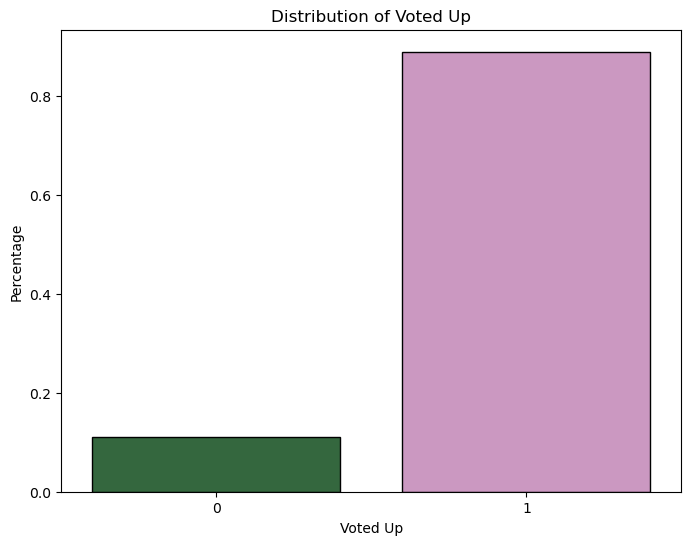

In [38]:
# distribution of voted up (target)

fig, ax = plt.subplots(figsize = (8, 6))
sns.barplot(data = voted_up, x = "index", y = "voted_up", edgecolor = "black", palette = "cubehelix")
plt.title("Distribution of Voted Up")
plt.xlabel("Voted Up")
plt.ylabel("Percentage")
plt.show();

There is a huge imbalance between True and False under the Voted Up column (this column tells if a specific user recommends the game or not)

In [148]:
# inspecting reviews with votes up

votes_up = final_df.loc[final_df["voted_up"] == 1][["num_games_owned", "num_reviews", "playtime_forever", "review", "voted_up", "weighted_vote_score", "votes_up"]]
votes_up

,num_games_owned,num_reviews,playtime_forever,review,voted_up,weighted_vote_score,votes_up
0,236,22,5650,The best game of all time. Don't believe me? Play it and find out yourself!,1,0.000000,0
1,78,2,2087,i like that it is an open world game that you can for days,1,0.000000,0
2,33,5,523,"I fucking love this game, its one of my childhood games and one of my favourite games. Although fallout 4 is gameplay wise more fun with smoother combat, and personally I like the building and crafting system, but Fallout 3 has a better story in my opinion. Definitely get it, its a blast to play.",1,0.000000,0
3,38,2,1142,All time great!,1,0.000000,0
4,69,13,266,Uras,1,0.000000,0
...,...,...,...,...,...,...,...
194029,40,3,94,"I like how the graphics were more smooth and crisp, and the fps were higher than the mobile\nloooove it.",1,0.371961,3
194030,343,7,3710,Loved this game when on ios platform. happy to play it again,1,0.398308,7
194031,168,27,971,"Named my first vault vault 69, the other vault 420\nafter I gave everyone ghetto names\nthen I stopped playing",1,0.277916,6
194033,197,12,1217,Finally! Now I can put my nvidia geforce gtx 1060 to good use!,1,0.000000,1


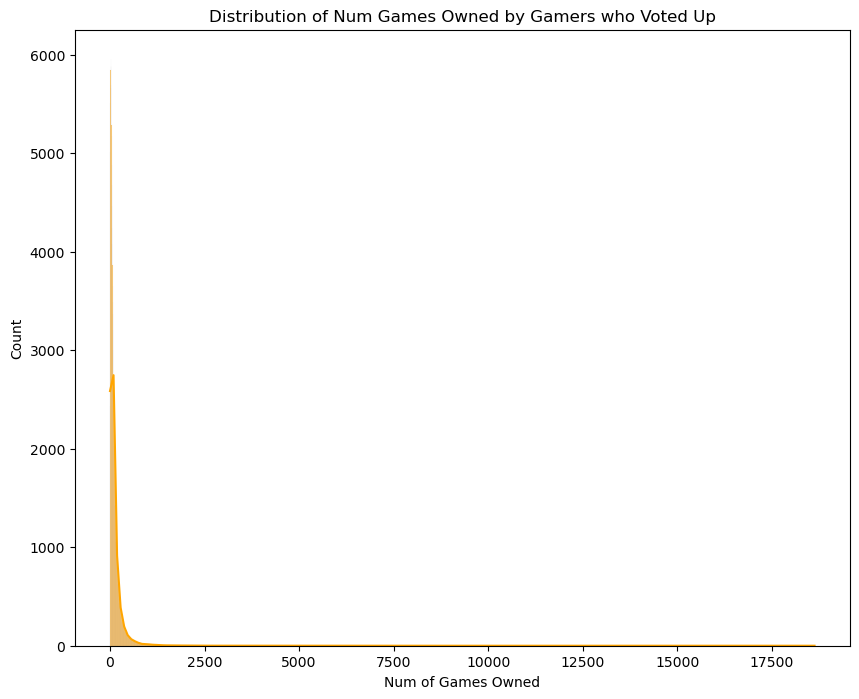

In [40]:
# distribution of num games owned by players who recommends the game

fig, ax = plt.subplots(figsize = (10, 8))
sns.histplot(data = votes_up, x = "num_games_owned", kde = True, color = "orange")
plt.title("Distribution of Num Games Owned by Gamers who Voted Up")
plt.xlabel("Num of Games Owned")
plt.show();

One gamer owns 18631 games which caused the histogram to be skewed

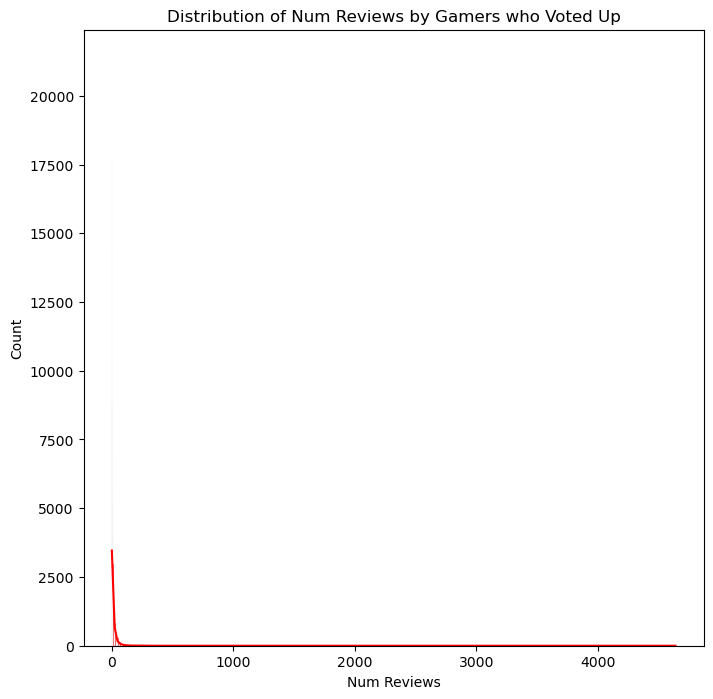

In [41]:
# distribution of num reviews of gamers who recommended the game

fig, ax = plt.subplots(figsize = (8, 8))
sns.histplot(data = votes_up, x = "num_reviews", kde = True, color = "red")
plt.title("Distribution of Num Reviews by Gamers who Voted Up")
plt.xlabel("Num Reviews")
plt.show();

One gamer made reviews 8847 times hence the skewness in the graph above

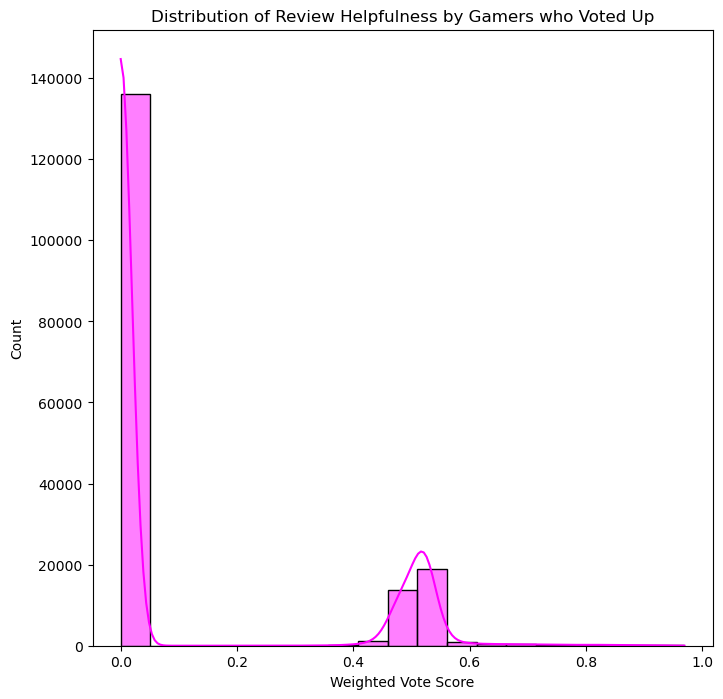

In [42]:
# distribution of weighted vote score of gamers who voted up

fig, ax = plt.subplots(figsize = (8, 8))
sns.histplot(data = votes_up, x = "weighted_vote_score", kde = True, color = "magenta")
plt.title("Distribution of Review Helpfulness by Gamers who Voted Up")
plt.xlabel("Weighted Vote Score")
plt.show();

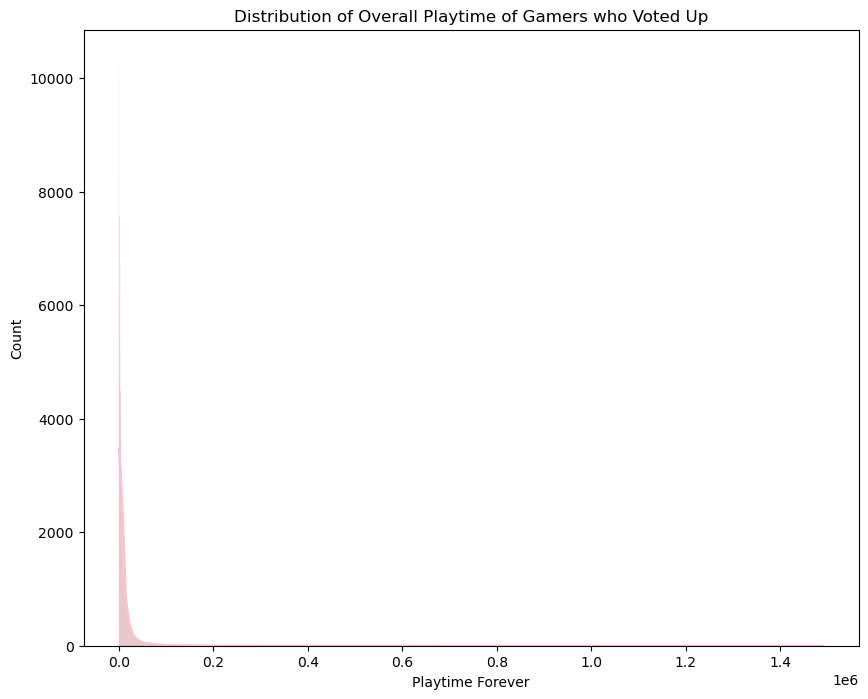

In [43]:
# distribution of over all playtime by gamers who voted up 

fig, ax = plt.subplots(figsize = (10, 8))
sns.histplot(data = votes_up, x = "playtime_forever", kde = True, color = "pink")
plt.title("Distribution of Overall Playtime of Gamers who Voted Up")
plt.xlabel("Playtime Forever")
plt.show()

In [153]:
# inspecting reviews with votes down

votes_down = final_df.loc[final_df["voted_up"] == 0][["num_games_owned", "num_reviews", "playtime_forever", "review", "voted_up", "weighted_vote_score", "votes_up"]]
votes_down

,num_games_owned,num_reviews,playtime_forever,review,voted_up,weighted_vote_score,votes_up
7,245,37,516,"New gamers think this game is good, treat yourself better",0,0.000000,0
16,75,13,218,game not working,0,0.000000,0
17,191,11,1298,"Was really enjoying myself playing it had 0 crashes other than when alt-tabbing which didn't bother me now to continue with the story I have to go too rivet city which keeps causing my fricking game to crash, It a once great game now legitimately broken and never fixed.",0,0.000000,0
18,369,25,448,"This game is a nightmare that requires an unbelievable amount of troubleshooting to get the game running nominally, even without mods.",0,0.000000,0
23,879,189,1054,"I'm only giving this a negative because Fallout: New Vegas exists. It is essentially the better version of Fallout 3. This game is a watered-down buggy mess. It's not like Vegas doesn't have bugs as it is a Bethesda game after all, but it feels a lot more alive and interesting than this game.",0,0.000000,0
...,...,...,...,...,...,...,...
194010,178,26,142,garbage\n\nwaste your time simulator,0,0.205882,18
194011,439,21,48,"Why do people play stupid **** like this? Terrible game, just terrible.\n\nEDIT: had to disable comments due to super butthurt Fallout fanboys.",0,0.102461,64
194013,583,36,1335,изи донат,0,0.343699,11
194026,867,384,144,Meh,0,0.195588,12


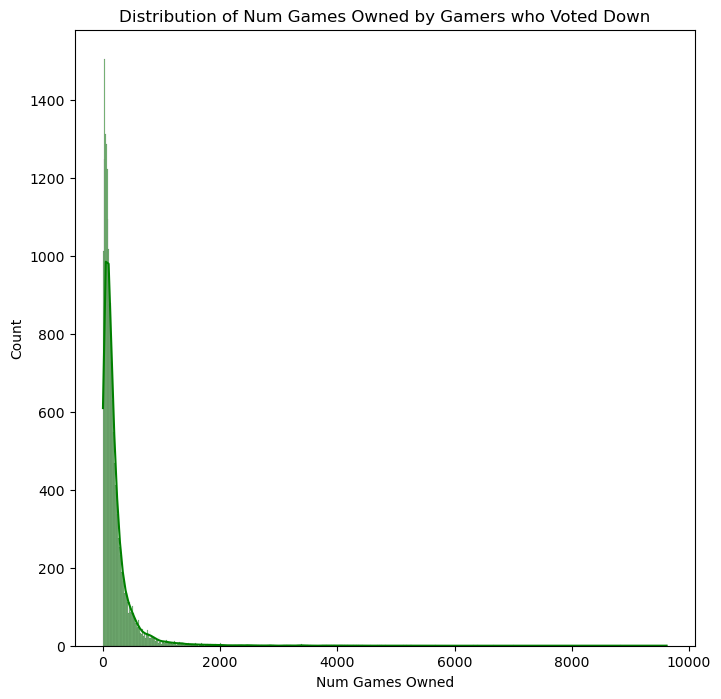

In [45]:
# distribution of num games owned by gamers who voted down

fig, ax = plt.subplots(figsize = (8, 8))
sns.histplot(data = votes_down, x = "num_games_owned", kde = True, color = "green")
plt.title("Distribution of Num Games Owned by Gamers who Voted Down")
plt.xlabel("Num Games Owned")
plt.show();

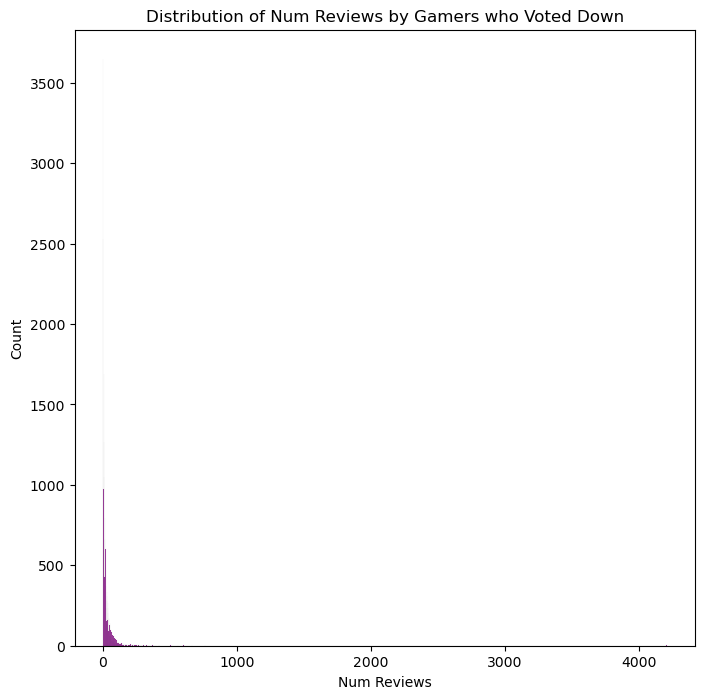

In [46]:
# distribution of num reviews by gamers who voted down 

fig, ax = plt.subplots(figsize = (8, 8))
sns.histplot(data = votes_down, x = "num_reviews", color = "purple")
plt.title("Distribution of Num Reviews by Gamers who Voted Down")
plt.xlabel("Num Reviews")
plt.show();

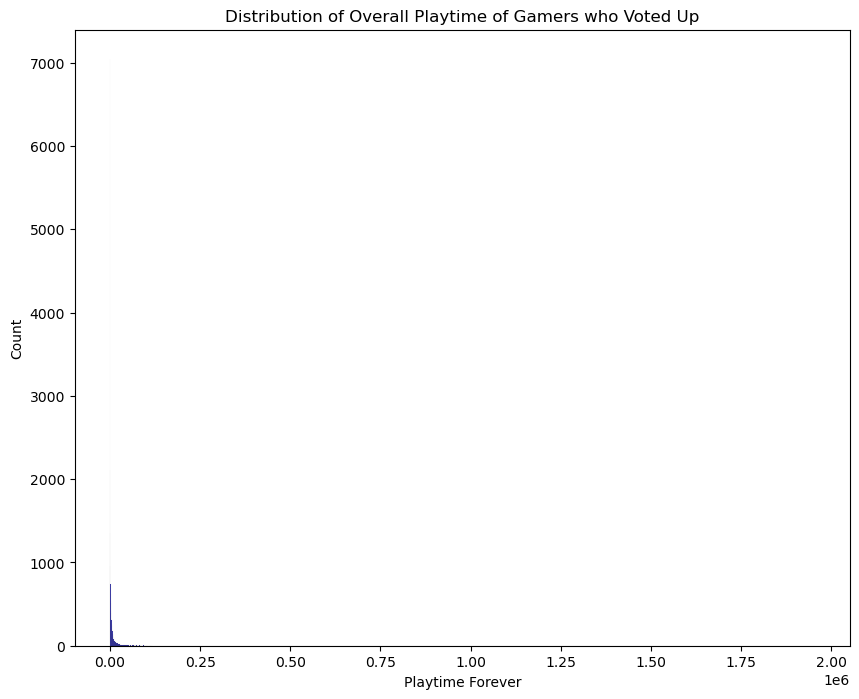

In [47]:
# distribution of overall playtime by gamers who voted down 

fig, ax = plt.subplots(figsize = (10, 8))
sns.histplot(data = votes_down, x = "playtime_forever", color = "DarkBlue")
plt.title("Distribution of Overall Playtime of Gamers who Voted Up")
plt.xlabel("Playtime Forever")
plt.show()

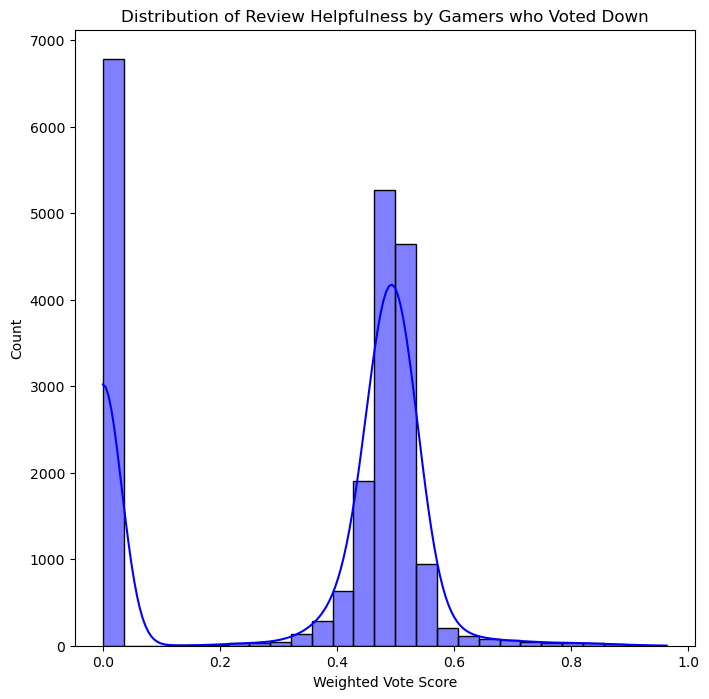

In [48]:
# distribution of weighted vote score of gamers who voted down

fig, ax = plt.subplots(figsize = (8, 8))
sns.histplot(data = votes_down, x = "weighted_vote_score", kde = True, color = "blue")
plt.title("Distribution of Review Helpfulness by Gamers who Voted Down")
plt.xlabel("Weighted Vote Score")
plt.show();

In [49]:
votes_down["weighted_vote_score"].max()

0.9627037644386292

The weighted vote score is a rating system created by Steam to rate the helpfulness of a review by allowing other people to vote if a certain review is helpful, it also takes into account if a review is created recently (more current reviews have a heavier weight)

In [50]:
# dropping unnecessary columns "last_played", "timestamp_created", "timestamp_updated", "recommendationid", "steam_purchase", "received_for_free", "written_during_early_access", "hidden_in_steam_china", "steam_china_location" 

final_df.drop(["playtime_at_review", "last_played", "timestamp_created", "timestamp_updated", "recommendationid", "steam_purchase", "received_for_free", "written_during_early_access", "hidden_in_steam_china", "steam_china_location"], axis = 1, inplace = True)

In [51]:
final_df

,steamid,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,language,review,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count
0,76561198274686747,236,22,5650,0,english,The best game of all time. Don't believe me? Play it and find out yourself!,1,0,0,0.000000,0
1,76561198330235225,78,2,2087,1681,english,i like that it is an open world game that you can for days,1,0,0,0.000000,0
2,76561199165748096,33,5,523,518,english,"I fucking love this game, its one of my childhood games and one of my favourite games. Although fallout 4 is gameplay wise more fun with smoother combat, and personally I like the building and crafting system, but Fallout 3 has a better story in my opinion. Definitely get it, its a blast to play.",1,0,0,0.000000,0
3,76561198213474099,38,2,1142,671,english,All time great!,1,0,0,0.000000,0
4,76561198166525195,69,13,266,48,english,Uras,1,0,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
194030,76561197974942528,343,7,3710,0,english,Loved this game when on ios platform. happy to play it again,1,7,2,0.398308,0
194031,76561198144517958,168,27,971,0,english,"Named my first vault vault 69, the other vault 420\nafter I gave everyone ghetto names\nthen I stopped playing",1,6,34,0.277916,0
194032,76561198160969677,440,19,66,0,english,A F2P pile of shit that is laced in microtransactions that doesn't belong on Steam. We do not need these shit mobile ports. Stop releasing them!,0,44,3,0.290692,16
194033,76561198028220390,197,12,1217,0,english,Finally! Now I can put my nvidia geforce gtx 1060 to good use!,1,1,5,0.000000,0


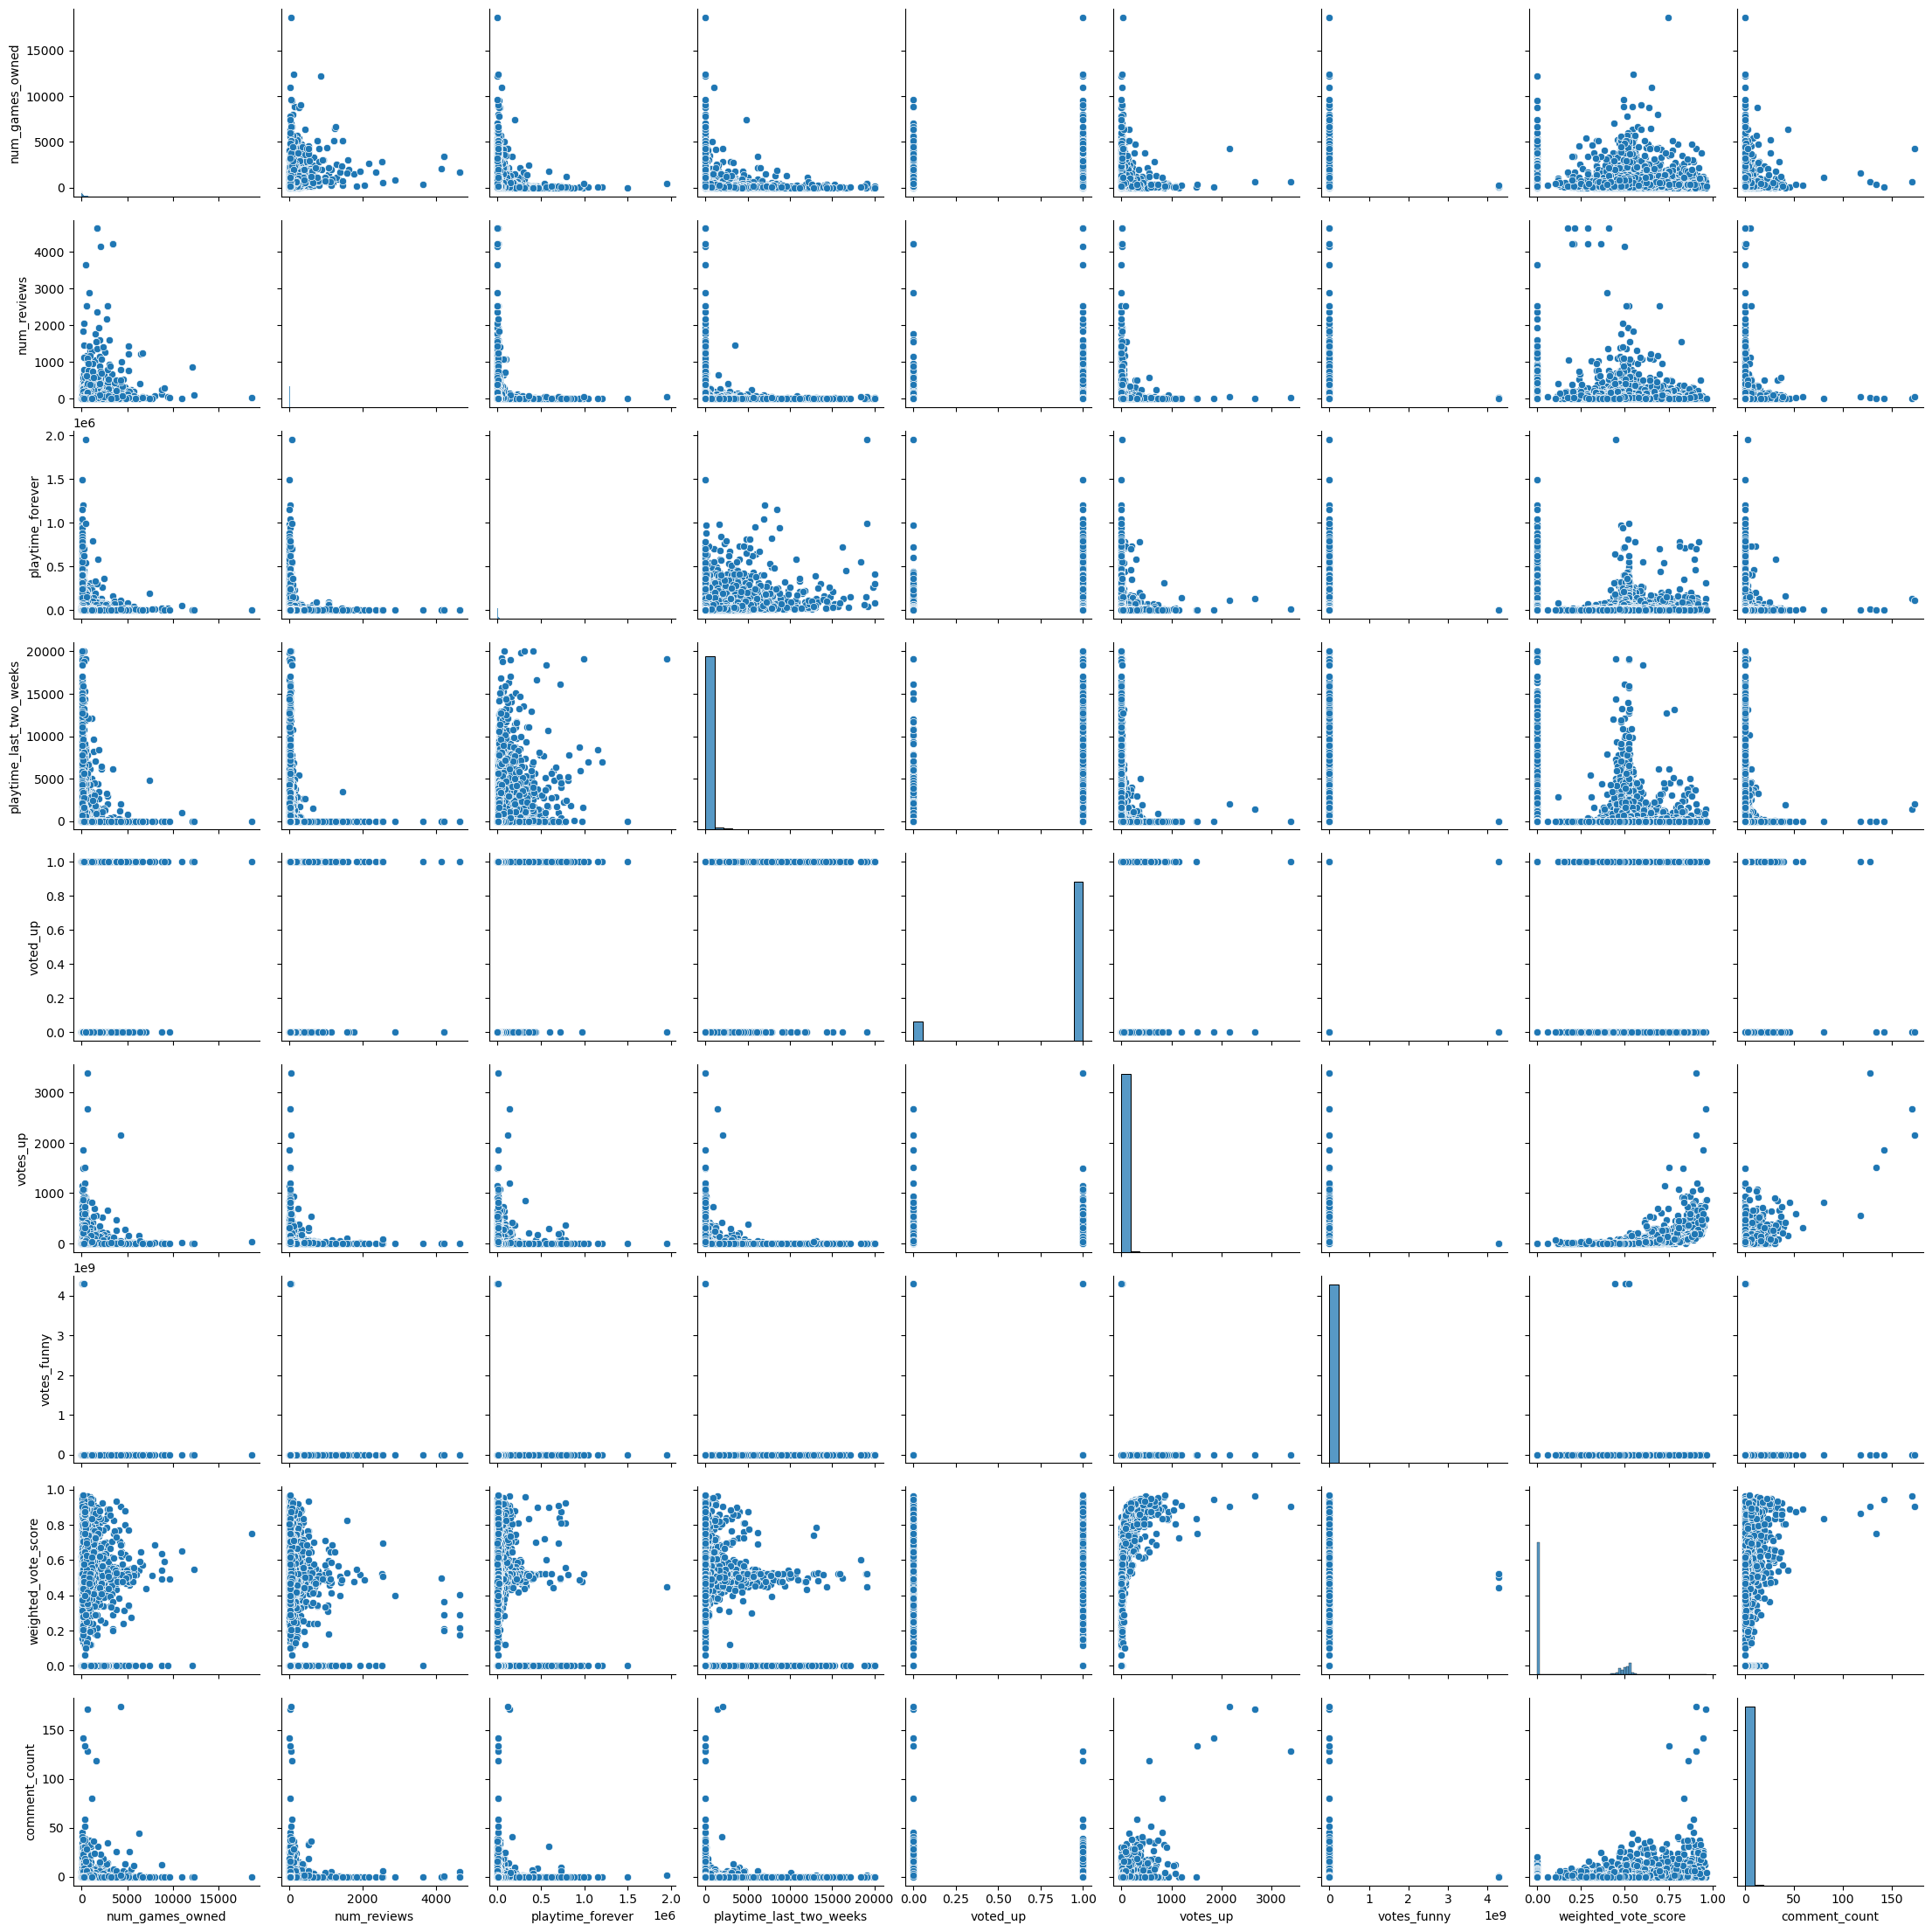

In [52]:
# pairplot 

sns.pairplot(final_df)

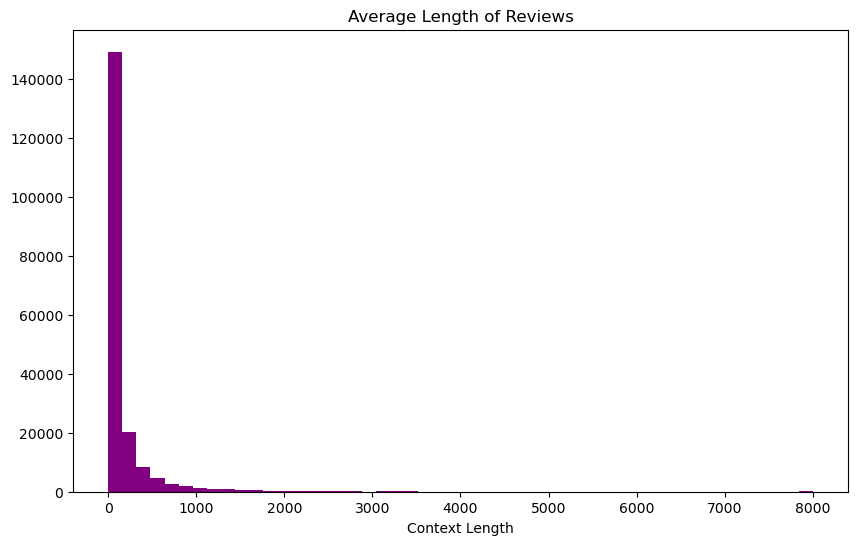

In [53]:
# checking average length of reviews

length_of_reviews = final_df["review"].apply(lambda x: len(x))

fig, ax = plt.subplots(figsize = (10, 6))
plt.hist(length_of_reviews, color = "purple", bins = 50)
plt.title("Average Length of Reviews")
plt.xlabel("Context Length")
plt.show();

## Pre-processing

In [54]:
tokenizer = RegexpTokenizer(r"(?u)\w{4,}")
stopwords_list = stopwords.words("english")
lemmatizer = WordNetLemmatizer()

def preprocess_text(text, tokenizer, stopwords_list, lemmatizer):

#   Standardize case (lowercase the text)
    lower_case = text.lower()
    
#   Remove hashtags, urls, mentions and strip whitespace
    tweet_lower = re.sub(r"@[a-z0-9_]+|#[a-z0-9_]+|http\S+", "", lower_case).strip().replace("\r", "").replace("\n", "").replace("\t", "")
    
#   Tokenize text using `tokenizer`
    tokenized = tokenizer.tokenize(tweet_lower)
    
#   Remove stopwords using `stopwords_list`
    token_stopped_list = [word for word in tokenized if (word.lower() not in stopwords_list) & (word not in ["quot", "good", "like", "know", "go", "much", "back", "really", "well", "would", "game", "fallout", "still", "time", "games", "even", "bethesda", "want", "make", "feel", "pero", "para", "make", "look", "hour"])]

#   Remove non-english text
    non_english_pattern = "[^a-zA-Z\s]+"
    filtered_words = []
    for word in token_stopped_list:
        match = re.search(non_english_pattern, word)
        if not match:
            filtered_words.append(word)
        
#   Lemmatize the tokenized text using 'lemmatizer'
    lemmatize = [lemmatizer.lemmatize(text) for text in filtered_words]

#   Return the preprocessed text
    return lemmatize


<>:20: DeprecationWarning: invalid escape sequence \s
<>:20: DeprecationWarning: invalid escape sequence \s
C:\Users\jocel\AppData\Local\Temp\ipykernel_42888\2925192208.py:20: DeprecationWarning: invalid escape sequence \s
  non_english_pattern = "[^a-zA-Z\s]+"


In [55]:
review_preprocessed = final_df["review"].apply(lambda x: preprocess_text(x, tokenizer, stopwords_list, lemmatizer))
review_preprocessed

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             [best, believe, play, find]
1                                                                                                                                                                                                                                                                                             

In [56]:
# creating a new column for preprocessed review

final_df["review_preprocessed"] = review_preprocessed

In [57]:
# creating another column with the preprocessed review joined as strings 

final_df["joined_review_preprocessed"] = final_df["review_preprocessed"].str.join(" ")

In [58]:
final_df

,steamid,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,language,review,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,review_preprocessed,joined_review_preprocessed
0,76561198274686747,236,22,5650,0,english,The best game of all time. Don't believe me? Play it and find out yourself!,1,0,0,0.000000,0,"[best, believe, play, find]",best believe play find
1,76561198330235225,78,2,2087,1681,english,i like that it is an open world game that you can for days,1,0,0,0.000000,0,"[open, world, day]",open world day
2,76561199165748096,33,5,523,518,english,"I fucking love this game, its one of my childhood games and one of my favourite games. Although fallout 4 is gameplay wise more fun with smoother combat, and personally I like the building and crafting system, but Fallout 3 has a better story in my opinion. Definitely get it, its a blast to play.",1,0,0,0.000000,0,"[fucking, love, childhood, favourite, although, gameplay, wise, smoother, combat, personally, building, crafting, system, better, story, opinion, definitely, blast, play]",fucking love childhood favourite although gameplay wise smoother combat personally building crafting system better story opinion definitely blast play
3,76561198213474099,38,2,1142,671,english,All time great!,1,0,0,0.000000,0,[great],great
4,76561198166525195,69,13,266,48,english,Uras,1,0,0,0.000000,0,[uras],uras
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194030,76561197974942528,343,7,3710,0,english,Loved this game when on ios platform. happy to play it again,1,7,2,0.398308,0,"[loved, platform, happy, play]",loved platform happy play
194031,76561198144517958,168,27,971,0,english,"Named my first vault vault 69, the other vault 420\nafter I gave everyone ghetto names\nthen I stopped playing",1,6,34,0.277916,0,"[named, first, vault, vault, vault, gave, everyone, ghetto, namesthen, stopped, playing]",named first vault vault vault gave everyone ghetto namesthen stopped playing
194032,76561198160969677,440,19,66,0,english,A F2P pile of shit that is laced in microtransactions that doesn't belong on Steam. We do not need these shit mobile ports. Stop releasing them!,0,44,3,0.290692,16,"[pile, shit, laced, microtransactions, belong, steam, need, shit, mobile, port, stop, releasing]",pile shit laced microtransactions belong steam need shit mobile port stop releasing
194033,76561198028220390,197,12,1217,0,english,Finally! Now I can put my nvidia geforce gtx 1060 to good use!,1,1,5,0.000000,0,"[finally, nvidia, geforce]",finally nvidia geforce


In [59]:
# saving preprocessed final dataframe in a pickle file 

final_df.to_pickle("preprocessed_final_df.pkl")

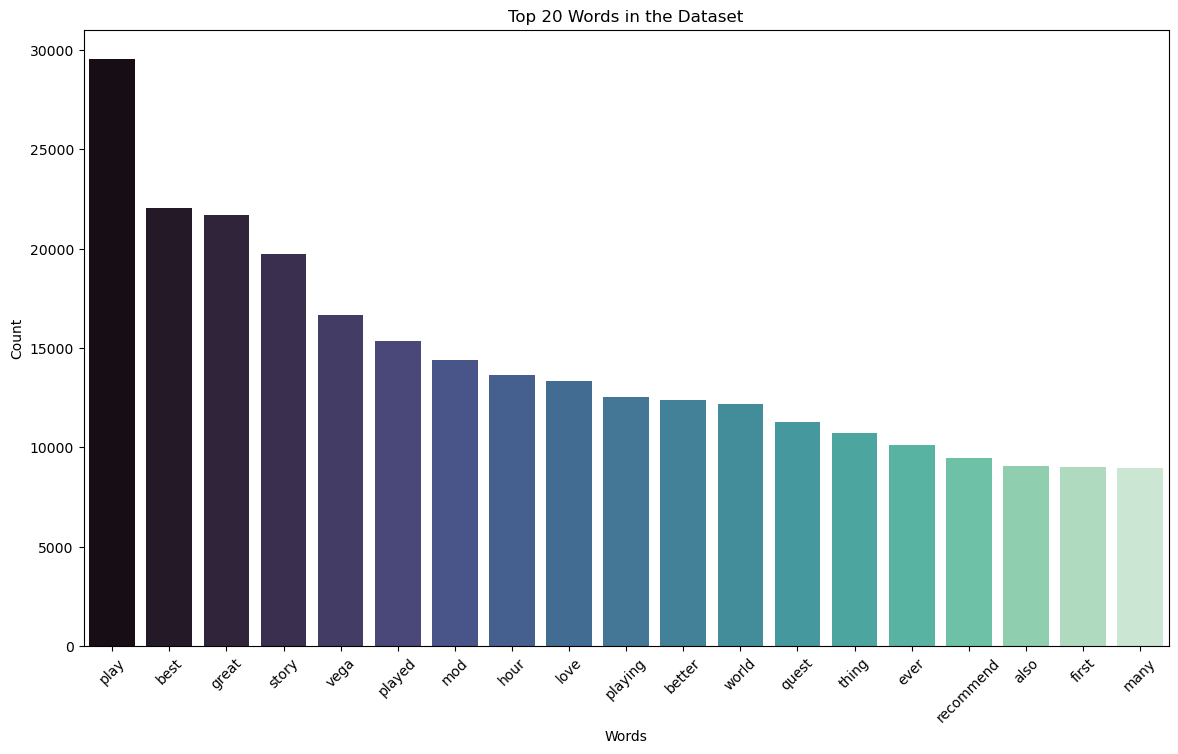

In [60]:
# visualizing frequency distribution

freq_dist = FreqDist(final_df["review_preprocessed"].explode())

fig, ax = plt.subplots(figsize = (14, 8))
top_20 = list(freq_dist.most_common(20))
labels = [i[0] for i in top_20]
values = [i[1] for i in top_20]
sns.barplot(x = labels, y = values, palette = "mako", ax = ax)
plt.title("Top 20 Words in the Dataset")
plt.xlabel("Words")
plt.ylabel("Count")
plt.xticks(rotation = 45)
plt.show();

In [61]:
freq_dict = {str(x) : v for x,v in freq_dist.items()}

In [62]:
freq_dict

{'best': 22047,
 'believe': 909,
 'play': 29531,
 'find': 5453,
 'open': 4661,
 'world': 12177,
 'day': 1477,
 'fucking': 2301,
 'love': 13320,
 'childhood': 248,
 'favourite': 1111,
 'although': 1492,
 'gameplay': 6611,
 'wise': 531,
 'smoother': 127,
 'combat': 3131,
 'personally': 1096,
 'building': 5182,
 'crafting': 1467,
 'system': 4739,
 'better': 12394,
 'story': 19736,
 'opinion': 2275,
 'definitely': 3072,
 'blast': 677,
 'great': 21675,
 'uras': 1,
 'used': 1881,
 'happy': 969,
 'nan': 29941,
 'gamers': 243,
 'think': 5497,
 'treat': 201,
 'poorly': 506,
 'optimized': 634,
 'nexus': 844,
 'let': 564,
 'recommend': 9461,
 'problem': 3764,
 'cant': 2248,
 'window': 5288,
 'need': 7487,
 'specific': 416,
 'please': 1620,
 'something': 4788,
 'remaster': 340,
 'cool': 3993,
 'shaders': 16,
 'compatible': 195,
 'thank': 670,
 'butch': 38,
 'suck': 1833,
 'mechanic': 2676,
 'buggy': 3010,
 'overall': 3697,
 'explore': 2545,
 'funny': 1177,
 'enclave': 437,
 'alright': 1191,
 'wors

C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=trans

C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transpose

C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transpose

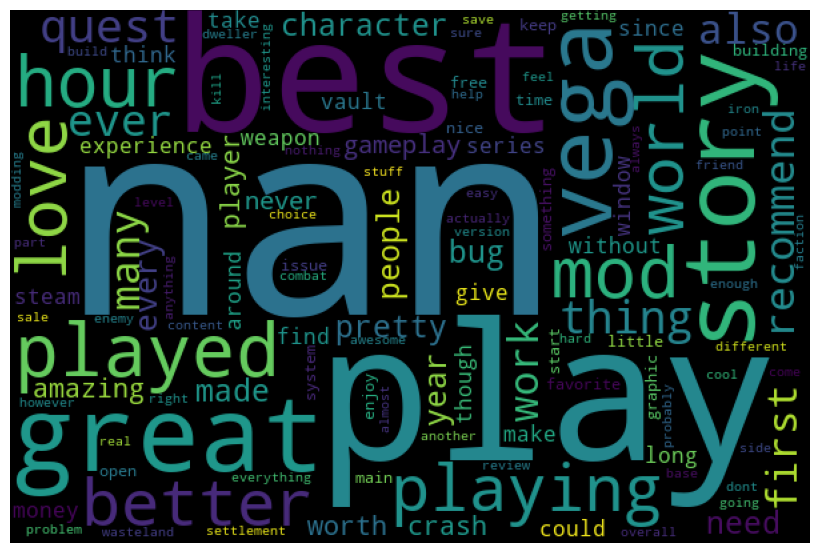

In [63]:
# creating wordCloud of most frequent words in the Dataset
wordcloud = WordCloud(width = 600, height = 400,
                colormap="viridis", background_color ='black',
                min_font_size = 10, random_state = 30).generate_from_frequencies(freq_dict)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show();

In [64]:
voted_up = final_df.loc[final_df["voted_up"] == 1]

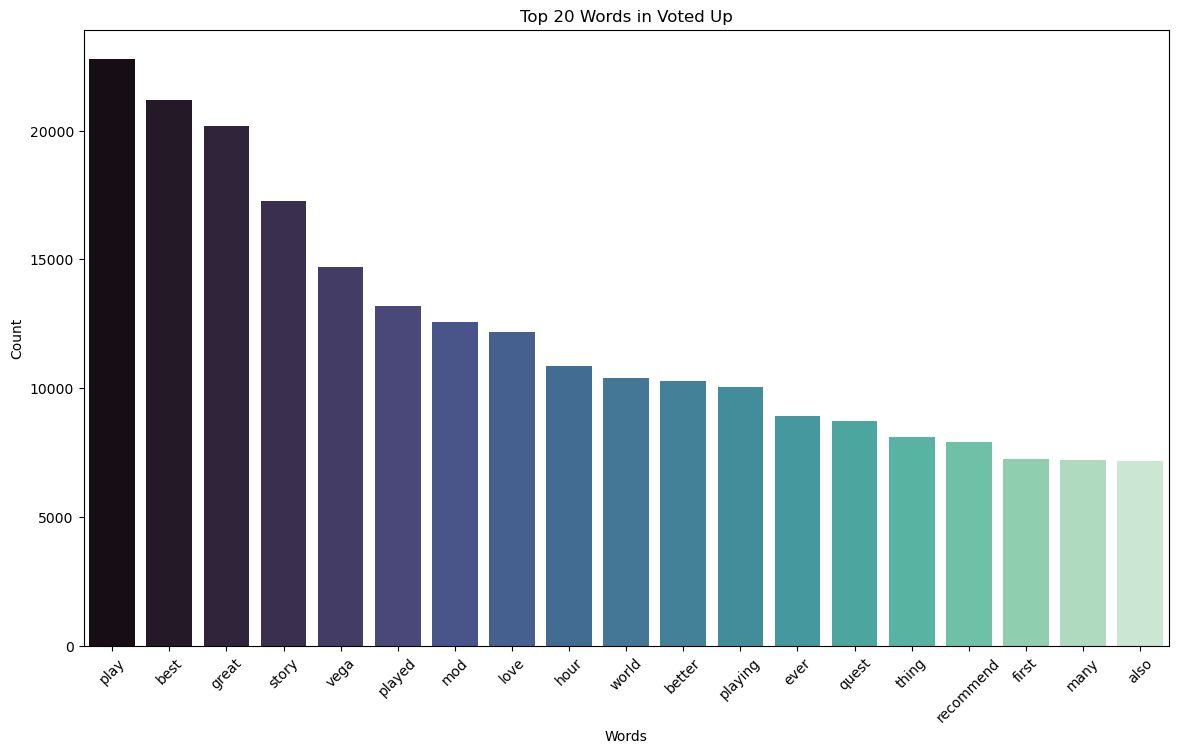

In [65]:
# visualizing frequency distribution of words in votes up

up_freq_dist = FreqDist(voted_up["review_preprocessed"].explode())

fig, ax = plt.subplots(figsize = (14, 8))
top_20 = list(up_freq_dist.most_common(20))
labels = [i[0] for i in top_20]
values = [i[1] for i in top_20]
sns.barplot(x = labels, y = values, palette = "mako", ax = ax)
plt.title("Top 20 Words in Voted Up")
plt.xlabel("Words")
plt.ylabel("Count")
plt.xticks(rotation = 45)
plt.show();

In [66]:
up_freq_dict = {str(x) : v for x,v in up_freq_dist.items()}

In [67]:
up_freq_dict

{'best': 21197,
 'believe': 699,
 'play': 22770,
 'find': 4167,
 'open': 3975,
 'world': 10391,
 'day': 1072,
 'fucking': 1358,
 'love': 12188,
 'childhood': 229,
 'favourite': 1053,
 'although': 1294,
 'gameplay': 5421,
 'wise': 451,
 'smoother': 112,
 'combat': 2455,
 'personally': 950,
 'building': 4152,
 'crafting': 1105,
 'system': 3498,
 'better': 10295,
 'story': 17273,
 'opinion': 2021,
 'definitely': 2849,
 'blast': 632,
 'great': 20198,
 'uras': 1,
 'used': 1426,
 'happy': 841,
 'nan': 28912,
 'poorly': 202,
 'optimized': 332,
 'nexus': 751,
 'let': 449,
 'recommend': 7906,
 'problem': 2474,
 'cant': 1218,
 'window': 3216,
 'need': 5864,
 'specific': 293,
 'please': 1231,
 'something': 3480,
 'remaster': 290,
 'cool': 3526,
 'shaders': 14,
 'compatible': 109,
 'thank': 547,
 'butch': 35,
 'suck': 1044,
 'mechanic': 2036,
 'buggy': 2078,
 'overall': 3261,
 'explore': 2278,
 'funny': 1053,
 'enclave': 305,
 'alright': 1059,
 'worse': 513,
 'vega': 14706,
 'series': 4790,
 'actu

In [68]:
del up_freq_dict["nan"]

C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=trans

C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=trans

C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transpose

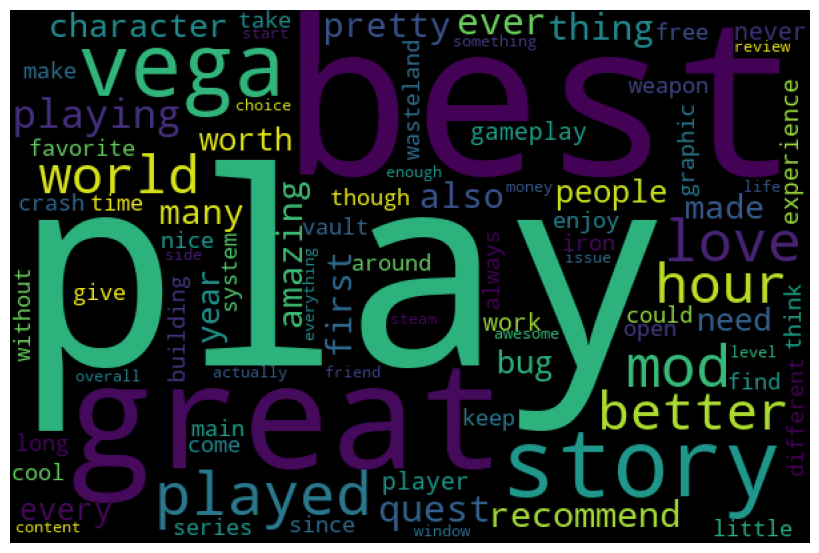

In [69]:
# creating wordCloud of most frequent words in the voted up
wordcloud = WordCloud(width = 600, height = 400,
                colormap="viridis", background_color ='black',
                min_font_size = 10, random_state = 30).generate_from_frequencies(up_freq_dict)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show();

In [121]:
voted_down = final_df.loc[final_df["voted_up"] == 0]

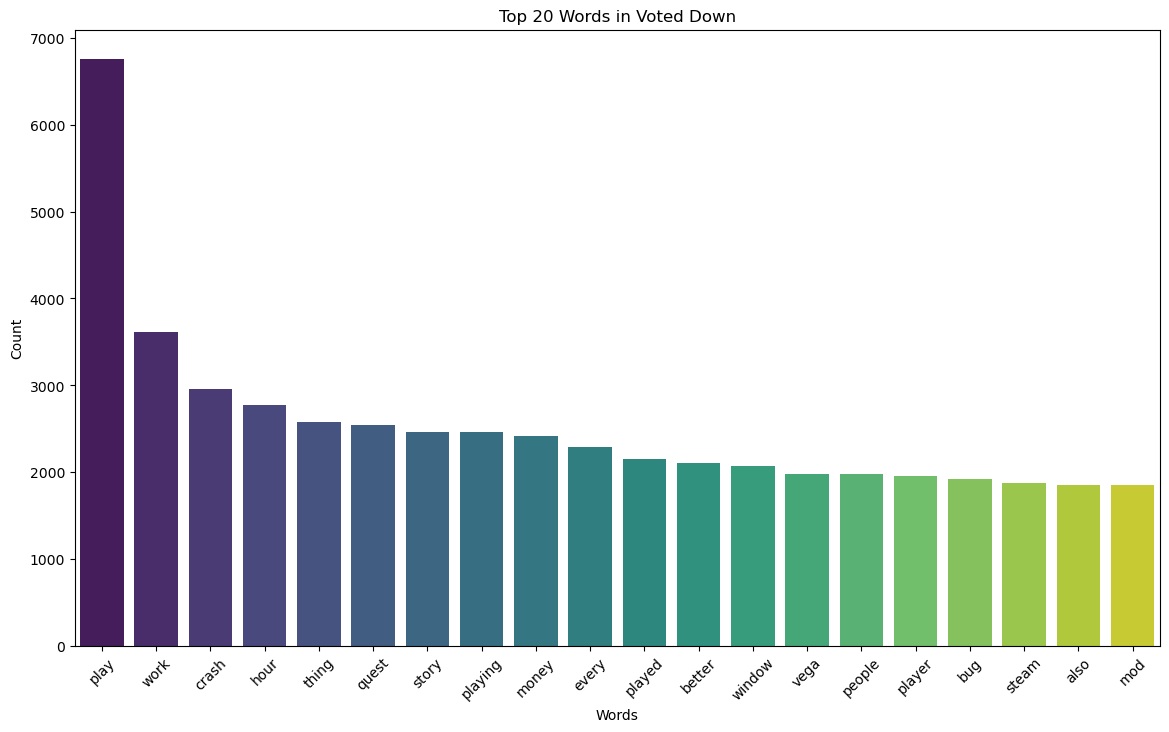

In [71]:
# visualizing frequency distribution of words in votes up

down_freq_dist = FreqDist(voted_down["review_preprocessed"].explode())

fig, ax = plt.subplots(figsize = (14, 8))
top_20 = list(down_freq_dist.most_common(20))
labels = [i[0] for i in top_20]
values = [i[1] for i in top_20]
sns.barplot(x = labels, y = values, palette = "viridis", ax = ax)
plt.title("Top 20 Words in Voted Down")
plt.xlabel("Words")
plt.ylabel("Count")
plt.xticks(rotation = 45)
plt.show();

In [72]:
down_freq_dict = {str(x) : v for x,v in down_freq_dist.items()}

In [73]:
down_freq_dict

{'gamers': 45,
 'think': 1152,
 'treat': 41,
 'better': 2099,
 'working': 485,
 'enjoying': 91,
 'playing': 2457,
 'crash': 2961,
 'tabbing': 24,
 'bother': 344,
 'continue': 249,
 'story': 2463,
 'rivet': 15,
 'city': 147,
 'keep': 1167,
 'causing': 55,
 'fricking': 4,
 'great': 1477,
 'legitimately': 21,
 'broken': 953,
 'never': 1446,
 'fixed': 550,
 'nightmare': 84,
 'requires': 219,
 'unbelievable': 29,
 'amount': 573,
 'troubleshooting': 70,
 'running': 694,
 'nominally': 1,
 'without': 1472,
 'mod': 1848,
 'giving': 250,
 'negative': 254,
 'vega': 1977,
 'exists': 83,
 'essentially': 91,
 'version': 1078,
 'watered': 23,
 'buggy': 932,
 'mess': 541,
 'bug': 1919,
 'feel': 1033,
 'alive': 56,
 'interesting': 635,
 'recommend': 1555,
 'worked': 313,
 'crashing': 797,
 'past': 442,
 'loading': 479,
 'screen': 869,
 'despite': 357,
 'using': 465,
 'information': 70,
 'guide': 181,
 'installing': 126,
 'wont': 605,
 'work': 3609,
 'unhappy': 5,
 'look': 409,
 'ugly': 105,
 'kinda': 2

In [122]:
del down_freq_dict["nan"]

C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=trans

C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\an

C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\joce

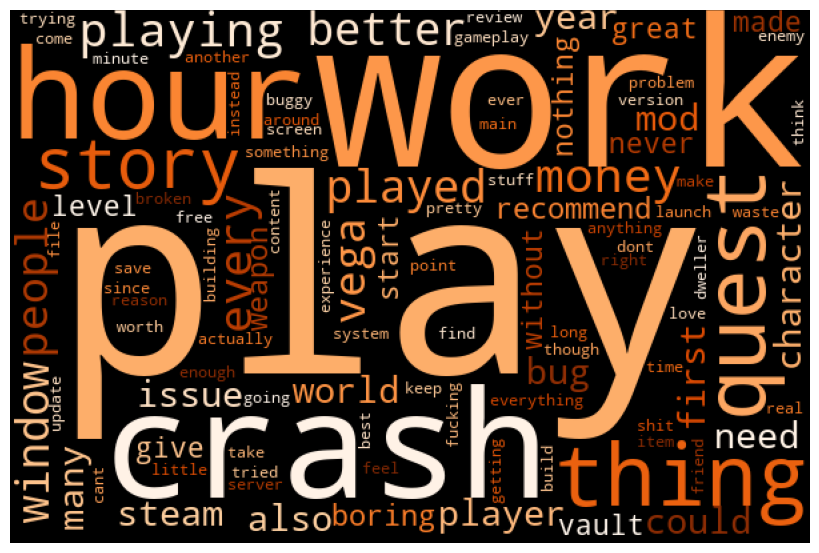

In [123]:
# creating wordCloud of most frequent words in the voted down 

wordcloud = WordCloud(width = 600, height = 400,
                colormap="Oranges", background_color ='black',
                min_font_size = 10, random_state = 30).generate_from_frequencies(down_freq_dict)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show();

## Modeling

In [75]:
# train test split 
X = final_df.drop(["review", "review_preprocessed", "steamid", "language", "voted_up"], axis = 1)
y = final_df["voted_up"]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state = 2021)

In [76]:
X_train

,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,votes_up,votes_funny,weighted_vote_score,comment_count,joined_review_preprocessed
157183,41,3,779,0,0,0,0.000000,0,fucked
46476,159,92,160,0,0,0,0.000000,0,remaster skyrim unecessary fuck juice wallet give money support greedy asshole developer publisher
144802,83,4,3816,0,0,0,0.476190,0,masterpiece perfectly represents recommend anyone looking sink
140651,201,1,7134,0,0,0,0.000000,0,taken many hour life past decade
62239,43,15,33073,1467,0,1,0.000000,1,xbox recently bought better spec playing modded hell xbox sometimes selection little restricted literally anything past bug mod bug great youre open using great nearly year later highly recommend
...,...,...,...,...,...,...,...,...,...
161839,154,2,3083,0,1,0,0.523810,0,best ever better
151393,33,4,511,0,0,0,0.000000,0,
133744,22,1,9920,0,0,0,0.000000,0,johnnnnnnnyyyyy gutairrrrrrrr
137276,37,24,2143,0,0,0,0.000000,0,extremely overrated


In [77]:
y_train

157183    1
46476     0
144802    1
140651    1
62239     1
         ..
161839    1
151393    1
133744    1
137276    1
91255     1
Name: voted_up, Length: 135821, dtype: int64

In [78]:
# count vectorizer
vec = CountVectorizer(min_df = 0.004, max_df = 0.95)

vec_train =vec.fit_transform(X_train['joined_review_preprocessed'])
vec_test = vec.transform(X_test['joined_review_preprocessed'])

In [79]:
vec_train

<135821x514 sparse matrix of type '<class 'numpy.int64'>'
	with 806989 stored elements in Compressed Sparse Row format>

In [80]:
vec_train1 = pd.DataFrame(vec_train.toarray(), columns = vec.get_feature_names_out())
vec_test1 = pd.DataFrame(vec_test.toarray(), columns = vec.get_feature_names_out())

In [81]:
df_train = pd.concat([X_train.drop(columns=['joined_review_preprocessed']).reset_index(),vec_train1.reset_index()], axis = 1)
df_test = pd.concat([X_test.drop(columns=['joined_review_preprocessed']).reset_index(),vec_test1.reset_index()], axis = 1)

In [82]:
df_train = df_train.drop("index", axis = 1)

In [83]:
df_test = df_test.drop("index", axis = 1)

In [84]:
df_train

,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,votes_up,votes_funny,weighted_vote_score,comment_count,ability,able,...,working,world,worse,worst,worth,writing,wrong,xbox,yeah,year
0,41,3,779,0,0,0,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,159,92,160,0,0,0,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,83,4,3816,0,0,0,0.476190,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,201,1,7134,0,0,0,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,43,15,33073,1467,0,1,0.000000,1,0,0,...,0,0,0,0,0,0,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135816,154,2,3083,0,1,0,0.523810,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135817,33,4,511,0,0,0,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135818,22,1,9920,0,0,0,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135819,37,24,2143,0,0,0,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
df_test

,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,votes_up,votes_funny,weighted_vote_score,comment_count,ability,able,...,working,world,worse,worst,worth,writing,wrong,xbox,yeah,year
0,84,30,838,0,1,1,0.000000,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,285,128,3132,0,0,0,0.000000,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2,37,14,6137,0,0,0,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,37,5,44994,0,0,0,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,28,2,2615,0,0,0,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58205,198,12,727,0,3,1,0.539986,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58206,69,8,3611,0,0,0,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58207,146,2,34143,230,0,0,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58208,96,37,71,0,2,0,0.521739,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [86]:
# selecting numerical and catergorical columns 

num_cols = df_train.select_dtypes(['int', 'float']).columns

In [87]:
# numeric pipeline
from sklearn.preprocessing import FunctionTransformer

numeric_pipeline = Pipeline([ 
        ("scaler", MinMaxScaler())
])

# column transformer

ct = ColumnTransformer(
    [("numpipe", numeric_pipeline, num_cols)])

## Multinomial Naive Bayes

In [88]:
pipe1 = Pipeline([
    ('preprocessing', ct),
    ('smote', SMOTE()),
    ('classifier', MultinomialNB())
])
pipe1

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['num_games_owned', 'num_reviews', 'playtime_forever',
       'playtime_last_two_weeks', 'votes_up', 'votes_funny',
       'weighted_vote_score', 'comment_count', 'ability', 'able',
       ...
       'working', 'world', 'worse', 'worst', 'worth', 'writing', 'wrong',
       'xbox', 'yeah', 'year'],
      dtype='object', length=522))])),
                ('smote', SMOTE()), ('classifier', MultinomialNB())])

In [89]:
# fit training set 
pipe1.fit(df_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['num_games_owned', 'num_reviews', 'playtime_forever',
       'playtime_last_two_weeks', 'votes_up', 'votes_funny',
       'weighted_vote_score', 'comment_count', 'ability', 'able',
       ...
       'working', 'world', 'worse', 'worst', 'worth', 'writing', 'wrong',
       'xbox', 'yeah', 'year'],
      dtype='object', length=522))])),
                ('smote', SMOTE()), ('classifier', MultinomialNB())])

In [90]:
# test set prediction 
pipe1_y_pred = pipe1.predict(df_test)

print("Accuracy Score:", pipe1.score(df_test, y_test))
print("Recall Score:", recall_score(y_test, pipe1_y_pred))
print("Precision Score:", precision_score(y_test, pipe1_y_pred))
print("F1 Score:", f1_score(y_test, pipe1_y_pred))

# classification report
print("Model 1 Classification Report: \n", classification_report(y_test, pipe1_y_pred))

Accuracy Score: 0.772152551108057
Recall Score: 0.7671454738262797
Precision Score: 0.9710548152486943
F1 Score: 0.8571397796184792
Model 1 Classification Report: 
               precision    recall  f1-score   support

           0       0.30      0.81      0.44      6345
           1       0.97      0.77      0.86     51865

    accuracy                           0.77     58210
   macro avg       0.64      0.79      0.65     58210
weighted avg       0.90      0.77      0.81     58210



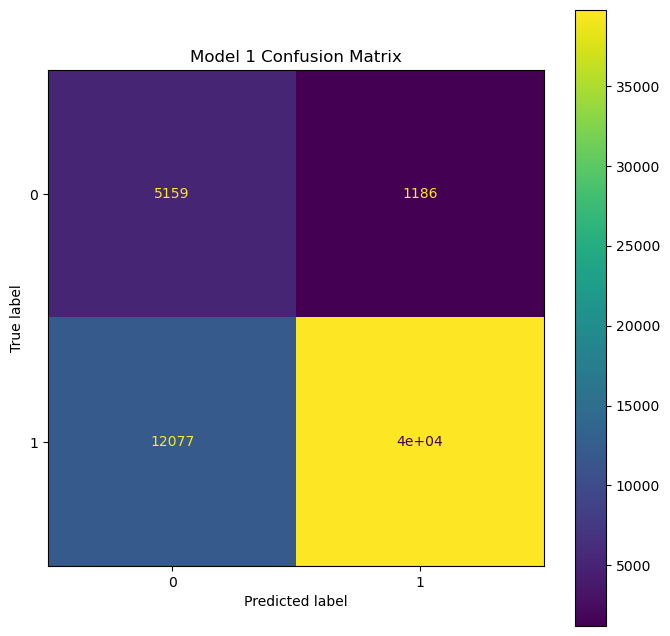

In [91]:
# plotting confusion matrix

fig, ax = plt.subplots(figsize = (8, 8))
ax.set_title("Model 1 Confusion Matrix")
plot_confusion_matrix(pipe1, df_test, y_test, ax = ax)
plt.show();

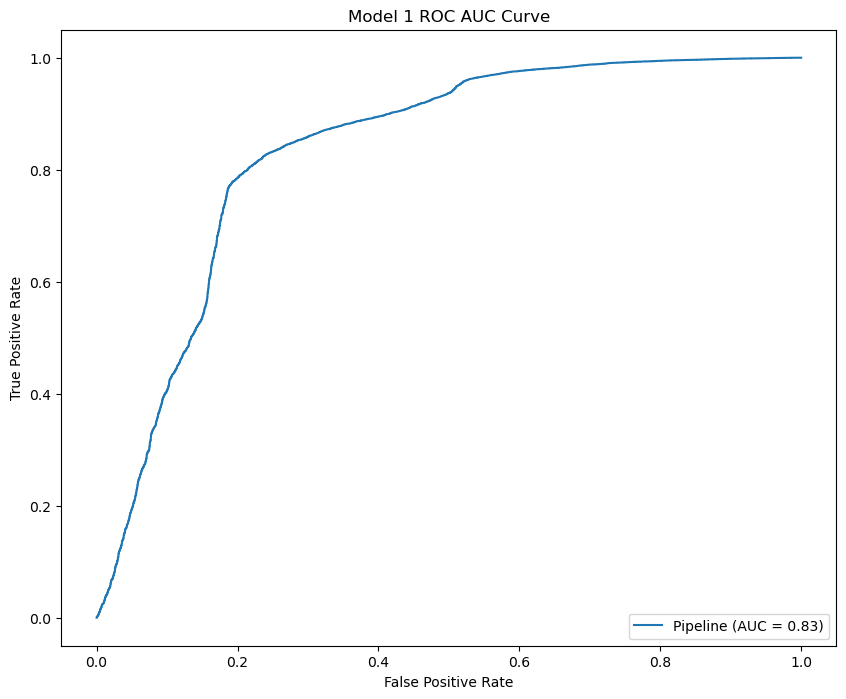

In [92]:
# plotting the AUC Curve 

fig, ax = plt.subplots(figsize = (10, 8))
plot_roc_curve(pipe1, df_test, y_test, ax = ax)
ax.set_title("Model 1 ROC AUC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show();

## Decision Trees

In [93]:
pipe2 = Pipeline([
    ('preprocessing', ct),
    ('smote', SMOTE()),
    ('tree', DecisionTreeClassifier(criterion = "entropy", max_depth = 15, min_samples_leaf = 1, min_samples_split = 3))
])
pipe2

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['num_games_owned', 'num_reviews', 'playtime_forever',
       'playtime_last_two_weeks', 'votes_up', 'votes_funny',
       'weighted_vote_score', 'comment_count', 'ability', 'able',
       ...
       'working', 'world', 'worse', 'worst', 'worth', 'writing', 'wrong',
       'xbox', 'yeah', 'year'],
      dtype='object', length=522))])),
                ('smote', SMOTE()),
                ('tree',
                 DecisionTreeClassifier(criterion='entropy', max_depth=15,
                                        min_samples_split=3))])

In [94]:
# parameter grid
# grid = [{
#     "tree__criterion": ["gini", "entropy"], 
#     "tree__max_depth": [12, 15, 17], 
#     "tree__min_samples_split": [1, 2, 3],
#     "tree__min_samples_leaf": [1, 2, 3]
# }]

# grid search
# gs_pipe2 = GridSearchCV(estimator = pipe2, param_grid = grid, scoring = "accuracy", cv = 3)

# gs_pipe2.fit(df_train, y_train)

# best params
# gs_pipe2.best_params_

# {'tree__criterion': 'entropy',
#  'tree__max_depth': 15,
#  'tree__min_samples_leaf': 1,
#  'tree__min_samples_split': 3}

In [95]:
# fitting train set 
pipe2.fit(df_train, y_train)

# prediction 
pipe2_y_pred = pipe2.predict(df_test)

# print("Accuracy Score:", pipe1.score(df_test, y_test))
# print("Recall Score:", recall_score(y_test, pipe2_y_pred))
# print("Precision Score:", precision_score(y_test, pipe2_y_pred))
# print("F1 Score:", f1_score(y_test, pipe2_y_pred))


# print("Model 2 Classification Report:", classification_report(y_test, pipe2_y_pred))

# Accuracy Score: 0.7724102387905858
# Recall Score: 0.926713583341367
# Precision Score: 0.9489624671760548
# F1 Score: 0.9377060694149093
# Model 2 Classification Report:               precision    recall  f1-score   support

#            0       0.50      0.59      0.54      6345
#            1       0.95      0.93      0.94     51865
# 
#     accuracy                           0.89     58210
#    macro avg       0.72      0.76      0.74     58210
# weighted avg       0.90      0.89      0.89     58210

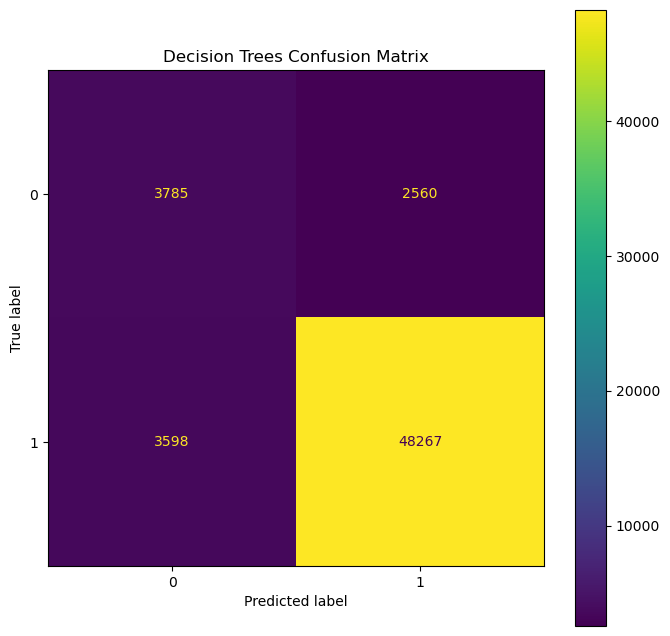

In [96]:
# plotting confusion matrix

fig, ax = plt.subplots(figsize = (8, 8))
ax.set_title("Decision Trees Confusion Matrix")
plot_confusion_matrix(pipe2, df_test, y_test, ax = ax)
plt.show();

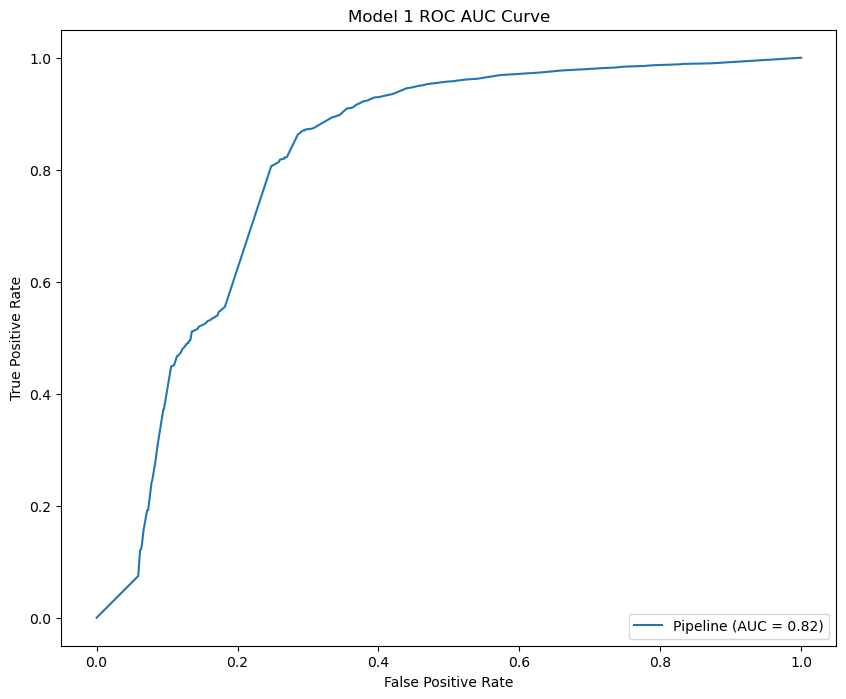

In [97]:
# plotting the AUC Curve 

fig, ax = plt.subplots(figsize = (10, 8))
plot_roc_curve(pipe2, df_test, y_test, ax = ax)
ax.set_title("Model 1 ROC AUC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show();

## Random Forest

In [98]:
pipe3 = Pipeline([
    ('preprocessing', ct),
    ('smote', SMOTE()),
    ('rfc', RandomForestClassifier(criterion = "gini", max_depth = 15, min_samples_leaf = 5, n_estimators = 150))
])
pipe3

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['num_games_owned', 'num_reviews', 'playtime_forever',
       'playtime_last_two_weeks', 'votes_up', 'votes_funny',
       'weighted_vote_score', 'comment_count', 'ability', 'able',
       ...
       'working', 'world', 'worse', 'worst', 'worth', 'writing', 'wrong',
       'xbox', 'yeah', 'year'],
      dtype='object', length=522))])),
                ('smote', SMOTE()),
                ('rfc',
                 RandomForestClassifier(max_depth=15, min_samples_leaf=5,
                                        n_estimators=150))])

In [99]:
# parameter grid
# grid = [{
#     "rfc__criterion": ["gini", "entropy"], 
#     "rfc__max_depth": [8, 12, 15], 
#     "rfc__n_estimators": [50, 150, 200],
#     "rfc__min_samples_leaf": [5, 20, 50]
# }]

# Grid Search
# gs_pipe3 = GridSearchCV(estimator = pipe3, param_grid = grid, scoring = "accuracy")

# gs_pipe3.fit(df_train, y_train)

# best params
# gs_pipe3.best_params_

# {'rfc__criterion': 'gini',
#  'rfc__max_depth': 15,
#  'rfc__min_samples_leaf': 5,
#  'rfc__n_estimators': 150}

In [100]:
# fitting train set 
pipe3.fit(df_train, y_train)

# prediction 
pipe3_y_pred = pipe3.predict(df_test)

print("Accuracy Score:", pipe3.score(df_test, y_test))
print("Recall Score:", recall_score(y_test, pipe3_y_pred))
print("Precision Score:", precision_score(y_test, pipe3_y_pred))
print("F1 Score:", f1_score(y_test, pipe3_y_pred))

print("Model 3 Classification Report:", classification_report(y_test, pipe3_y_pred))

Accuracy Score: 0.8633911699020786
Recall Score: 0.8831389183457052
Precision Score: 0.9603522381801027
F1 Score: 0.9201285656890317
Model 3 Classification Report:               precision    recall  f1-score   support

           0       0.42      0.70      0.53      6345
           1       0.96      0.88      0.92     51865

    accuracy                           0.86     58210
   macro avg       0.69      0.79      0.72     58210
weighted avg       0.90      0.86      0.88     58210



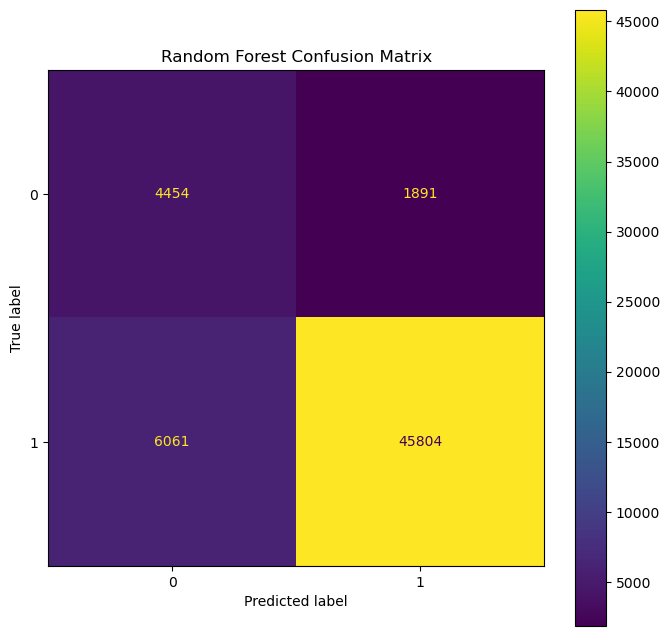

In [101]:
# plotting confusion matrix

fig, ax = plt.subplots(figsize = (8, 8))
ax.set_title("Random Forest Confusion Matrix")
plot_confusion_matrix(pipe3, df_test, y_test, ax = ax)
plt.show();

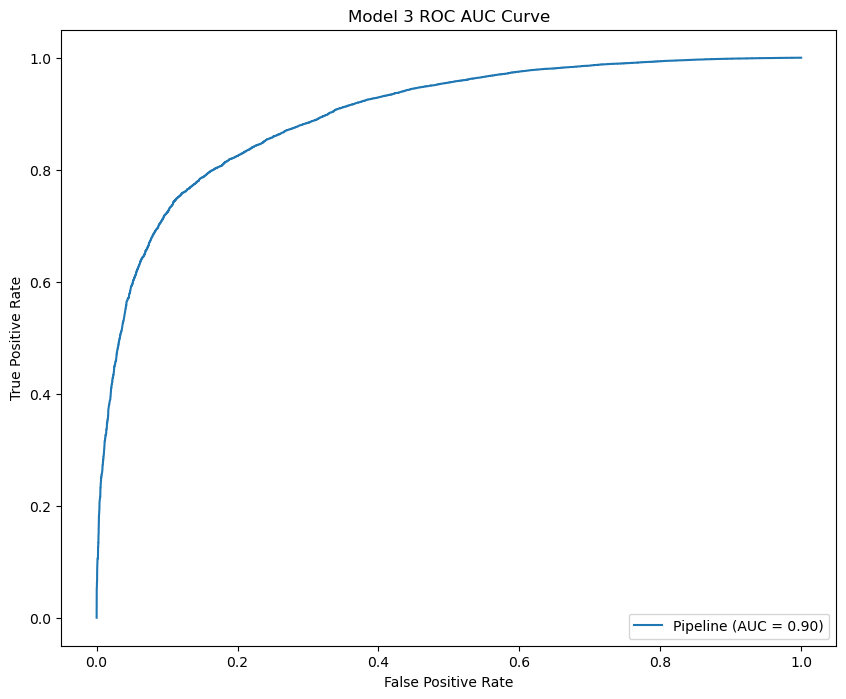

In [102]:
# plotting the AUC Curve 

fig, ax = plt.subplots(figsize = (10, 8))
plot_roc_curve(pipe3, df_test, y_test, ax = ax)
ax.set_title("Model 3 ROC AUC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show();

## XGBOOST

In [103]:
pipe4 = Pipeline([
    ('preprocessing', ct),
    ('smote', SMOTE()),
    ('xgb', XGBClassifier(gamma = 1.5, learning_rate = 0.2, max_depth = 15, min_child_weight = 3, n_estimators = 150))
])
pipe4

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['num_games_owned', 'num_reviews', 'playtime_forever',
       'playtime_last_two_weeks', 'votes_up', 'votes_funny',
       'weighted_vote_score', 'comment_count', 'ability', 'able',
       ...
       'working', 'world', 'worse', 'worst', 'worth', 'writing', 'wrong',
       'xb...
                               interaction_constraints=None, learning_rate=0.2,
                               max_delta_step=None, max_depth=15,
                               min_child_weight=3, missing=nan,
                               monotone_constraints=None, n_estimators=150,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, rand

In [104]:
# parameter grid
# grid = [{
#     "xgb__gamma": [1.5, 2, 2.5], 
#     "xgb__learning_rate": [0.2, 0.4, 0.5], 
#     "xgb__max_depth": [11, 13, 15],
#     "xgb__min_child_weight": [1, 2, 3], 
#     "xgb__n_estimators": [75, 100, 150]
# }]

# grid search
# gs_pipe4 = GridSearchCV(estimator = pipe4, param_grid = grid, scoring = "accuracy")

# gs_pipe4.fit(df_train, y_train)

# best params
# gs_pipe4.best_params_

# {'xgb__gamma': 1.5,
#  'xgb__learning_rate': 0.2,
#  'xgb__max_depth': 15,
#  'xgb__min_child_weight': 3,
#  'xgb__n_estimators': 150}

In [105]:
# fitting train set 
pipe4.fit(df_train, y_train)

# prediction 
pipe4_y_pred = pipe4.predict(df_test)

print("Accuracy Score:", pipe4.score(df_test, y_test))
print("Recall Score:", recall_score(y_test, pipe4_y_pred))
print("Precision Score:", precision_score(y_test, pipe4_y_pred))
print("F1 Score:", f1_score(y_test, pipe4_y_pred))

print("Model 3 Classification Report:", classification_report(y_test, pipe4_y_pred))

[10:28:05] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: 0.9334306820133997
Recall Score: 0.9736238310999711
Precision Score: 0.9527016828918572
F1 Score: 0.9630491374953514
Model 3 Classification Report:               precision    recall  f1-score   support

           0       0.74      0.60      0.66      6345
           1       0.95      0.97      0.96     51865

    accuracy                           0.93     58210
   macro avg       0.84      0.79      0.81     58210
weighted avg       0.93      0.93      0.93     58210



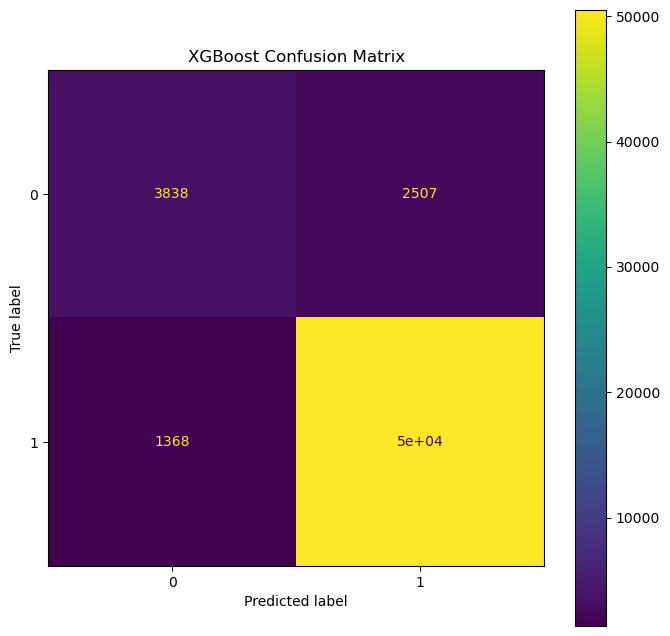

In [106]:
# plotting confusion matrix

fig, ax = plt.subplots(figsize = (8, 8))
ax.set_title("XGBoost Confusion Matrix")
plot_confusion_matrix(pipe4, df_test, y_test, ax = ax)
plt.show();

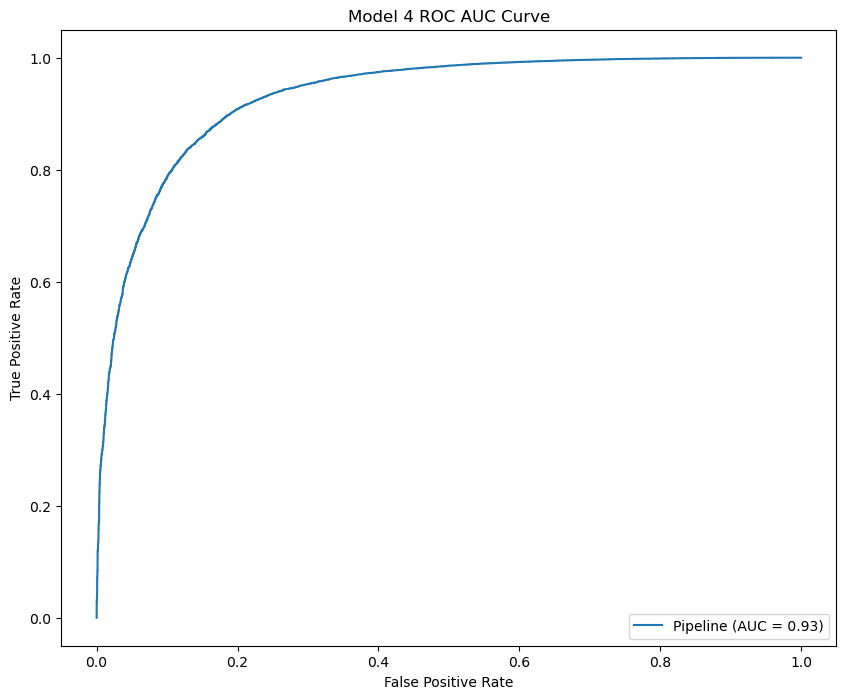

In [107]:
# plotting the AUC Curve 

fig, ax = plt.subplots(figsize = (10, 8))
plot_roc_curve(pipe4, df_test, y_test, ax = ax)
ax.set_title("Model 4 ROC AUC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show();

## Ensemble Method - Stacked Multi NB & XGBoost

In [108]:
estimators = [
    ('multinb', MultinomialNB(alpha = 0.5,
                              fit_prior = False)),
    ('xgb', XGBClassifier(random_state = 51,
                          gamma = 1.5,
                          learning_rate = 0.2,
                          max_depth = 15,
                          min_child_weight = 3,
                          n_estimators = 150))
]

In [109]:
stacking = StackingClassifier(estimators)

In [110]:
pipe5 = Pipeline([
    ("preprocessing", ct), 
    ("smote", SMOTE()), 
    ("ensemble", stacking)
])
pipe5

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['num_games_owned', 'num_reviews', 'playtime_forever',
       'playtime_last_two_weeks', 'votes_up', 'votes_funny',
       'weighted_vote_score', 'comment_count', 'ability', 'able',
       ...
       'working', 'world', 'worse', 'worst', 'worth', 'writing', 'wrong',
       'xb...
                                                               interaction_constraints=None,
                                                               learning_rate=0.2,
                                                               max_delta_step=None,
                                                               max_depth=15,
                                                               min_ch

In [111]:
# fit train set 
pipe5.fit(df_train, y_train)

# prediction 
pipe5_y_pred = pipe5.predict(df_test)

# print("Model 5 Classification Report: \n", classification_report(y_test, pipe5_y_pred))

# Model 5 Classification Report: 
#                precision    recall  f1-score   support
# 
#            0       0.65      0.70      0.67      6345
#            1       0.96      0.95      0.96     51865

#     accuracy                           0.93     58210
#    macro avg       0.81      0.83      0.82     58210
# weighted avg       0.93      0.93      0.93     58210

[10:31:26] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:34:53] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:37:32] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:40:16] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

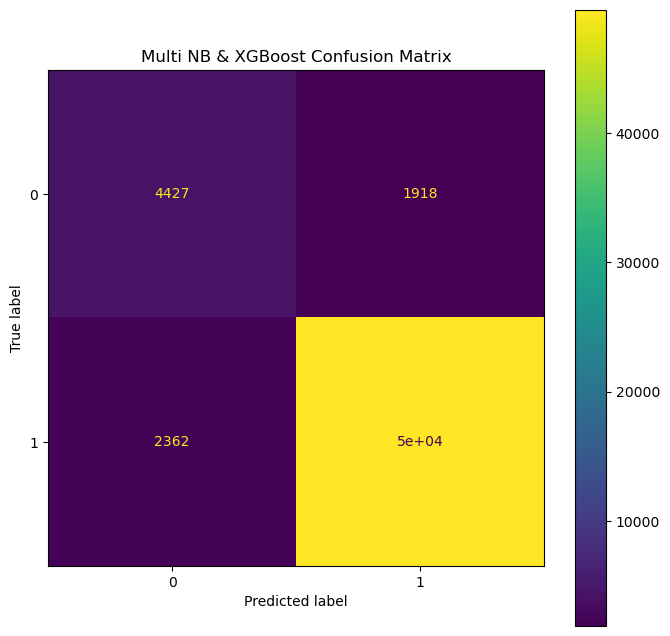

In [112]:
# plotting confusion matrix

fig, ax = plt.subplots(figsize = (8, 8))
ax.set_title("Multi NB & XGBoost Confusion Matrix")
plot_confusion_matrix(pipe5, df_test, y_test, ax = ax)
plt.show();

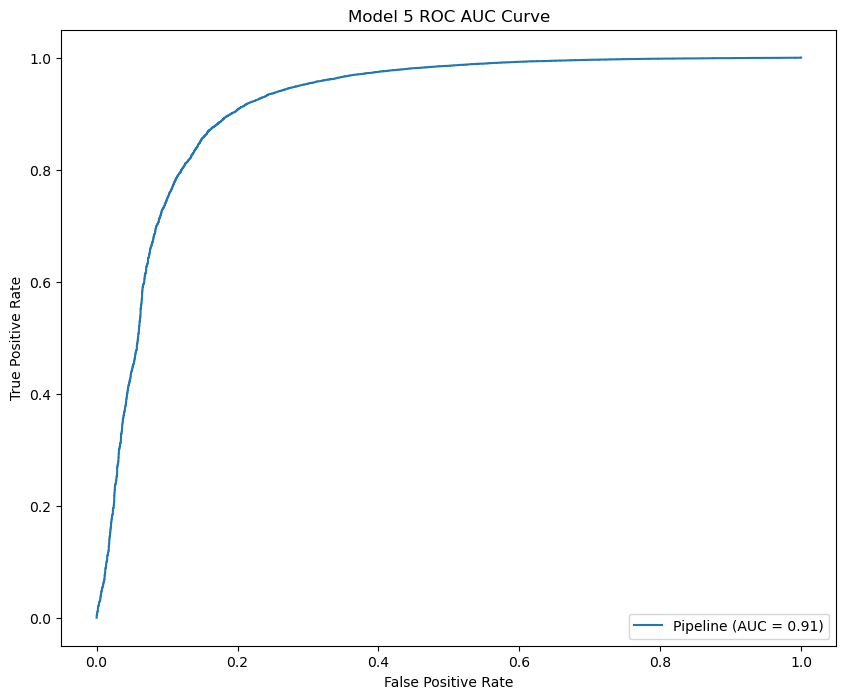

In [113]:
# plotting the AUC Curve 

fig, ax = plt.subplots(figsize = (10, 8))
plot_roc_curve(pipe5, df_test, y_test, ax = ax)
ax.set_title("Model 5 ROC AUC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show();

## Ensemble Method - Stacked Multi NB & Random Forest

In [114]:
estimators = [
    ('multinb', MultinomialNB(alpha = 0.5,
                              fit_prior = False)),
    ('rcf', RandomForestClassifier(criterion = "gini",
                                   max_depth = 15, 
                                   min_samples_leaf = 5,
                                   n_estimators = 150))
]

In [115]:
stacking1 = StackingClassifier(estimators)

In [116]:
pipe6 = Pipeline([
    ("preprocessing", ct), 
    ("smote", SMOTE()), 
    ("ensemble", stacking1)
])
pipe6

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['num_games_owned', 'num_reviews', 'playtime_forever',
       'playtime_last_two_weeks', 'votes_up', 'votes_funny',
       'weighted_vote_score', 'comment_count', 'ability', 'able',
       ...
       'working', 'world', 'worse', 'worst', 'worth', 'writing', 'wrong',
       'xbox', 'yeah', 'year'],
      dtype='object', length=522))])),
                ('smote', SMOTE()),
                ('ensemble',
                 StackingClassifier(estimators=[('multinb',
                                                 MultinomialNB(alpha=0.5,
                                                               fit_prior=False)),
                                                ('rcf',
           

In [117]:
# fit train set 
pipe6.fit(df_train, y_train)

# prediction 
pipe6_y_pred = pipe6.predict(df_test)

print("Model 6 Classification Report: \n", classification_report(y_test, pipe6_y_pred))

Model 6 Classification Report: 
               precision    recall  f1-score   support

           0       0.42      0.74      0.53      6345
           1       0.96      0.87      0.92     51865

    accuracy                           0.86     58210
   macro avg       0.69      0.81      0.73     58210
weighted avg       0.91      0.86      0.88     58210



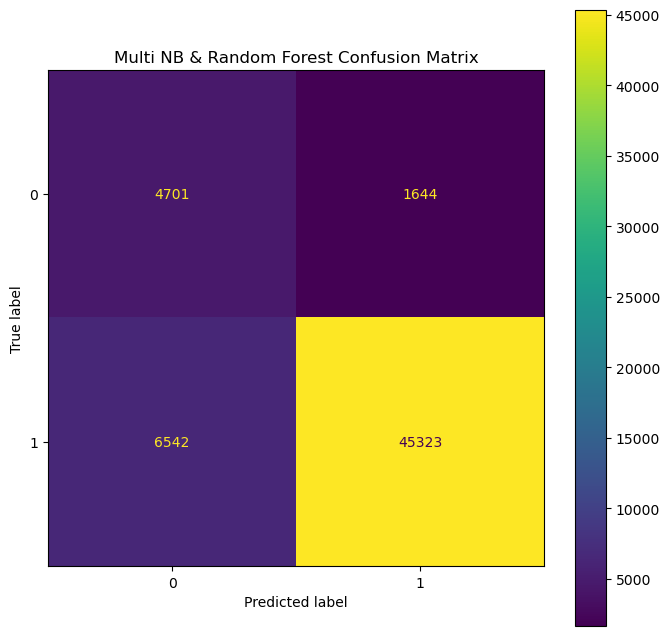

In [118]:
# plotting confusion matrix

fig, ax = plt.subplots(figsize = (8, 8))
ax.set_title("Multi NB & Random Forest Confusion Matrix")
plot_confusion_matrix(pipe6, df_test, y_test, ax = ax)
plt.show();

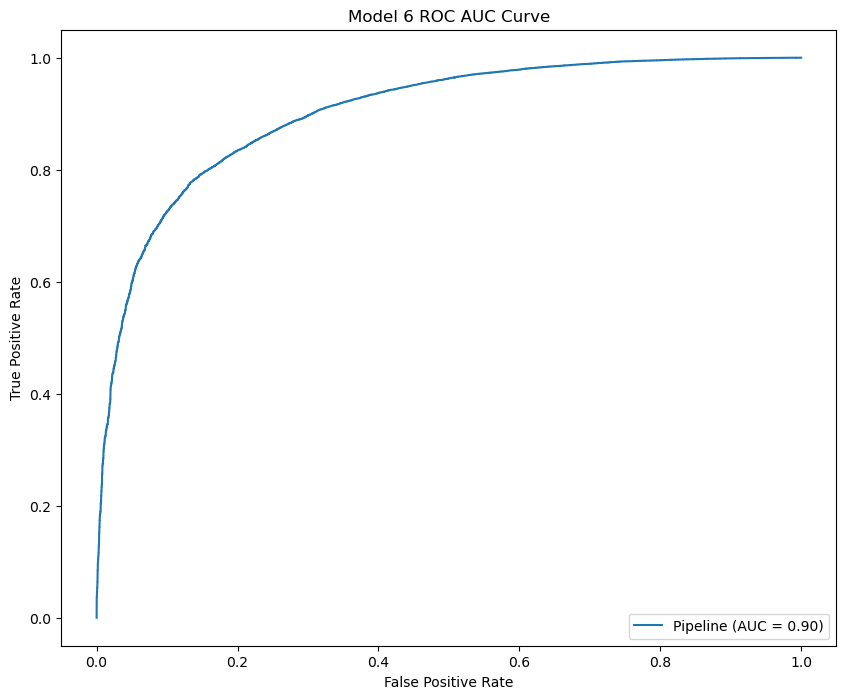

In [119]:
# plotting the AUC Curve 

fig, ax = plt.subplots(figsize = (10, 8))
plot_roc_curve(pipe6, df_test, y_test, ax = ax)
ax.set_title("Model 6 ROC AUC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show();

## Feature Importances

In [132]:
xgboost = pipe4.named_steps["xgb"]
weight = xgboost.feature_importances_
weight

array([0.00105063, 0.00455739, 0.00225788, 0.00081943, 0.06588526,
       0.01699077, 0.00666304, 0.00457471, 0.        , 0.00181458,
       0.        , 0.00078547, 0.00128576, 0.        , 0.00069085,
       0.0006547 , 0.00111587, 0.00044348, 0.00152958, 0.00075971,
       0.00110879, 0.00091848, 0.00112472, 0.00140488, 0.00244586,
       0.00089761, 0.00205199, 0.00086136, 0.00095645, 0.00192351,
       0.00672939, 0.00078041, 0.00189558, 0.00075407, 0.00358088,
       0.00097534, 0.00191645, 0.00196851, 0.000547  , 0.00079881,
       0.00112057, 0.0011737 , 0.        , 0.        , 0.00219774,
       0.00694973, 0.00249207, 0.00108014, 0.00107461, 0.00096625,
       0.00127519, 0.00174198, 0.00203961, 0.        , 0.01775115,
       0.00213248, 0.00079555, 0.00870407, 0.00079478, 0.00109252,
       0.00072767, 0.00555173, 0.00857814, 0.0049305 , 0.0008116 ,
       0.00069586, 0.00139765, 0.00139051, 0.00157337, 0.00418229,
       0.00608007, 0.00051195, 0.00157313, 0.00069211, 0.00179

In [134]:
features = df_train.columns
features

Index(['num_games_owned', 'num_reviews', 'playtime_forever',
       'playtime_last_two_weeks', 'votes_up', 'votes_funny',
       'weighted_vote_score', 'comment_count', 'ability', 'able',
       ...
       'working', 'world', 'worse', 'worst', 'worth', 'writing', 'wrong',
       'xbox', 'yeah', 'year'],
      dtype='object', length=522)

In [139]:
coef = pd.DataFrame({"feature": features, "weight": list(weight)}, columns=["feature", "weight"])
coef = coef.sort_values(by="weight").reset_index()
coef = coef.drop(["index"], axis = 1)

In [140]:
top10 = coef.nlargest(10, "weight")
top10=top10.sort_values(by='weight',ascending=True)

In [141]:
bottom10 = coef.nsmallest(10, "weight")
bottom10

,feature,weight
0,detail,0.0
1,special,0.0
2,npc,0.0
3,offer,0.0
4,others,0.0
5,endless,0.0
6,truly,0.0
7,early,0.0
8,decision,0.0
9,day,0.0


In [142]:
top_bottom = bottom10.append(top10, ignore_index = True)
top_bottom

,feature,weight
0,detail,0.000000
1,special,0.000000
2,npc,0.000000
3,offer,0.000000
4,others,0.000000
5,endless,0.000000
6,truly,0.000000
7,early,0.000000
8,decision,0.000000
9,day,0.000000


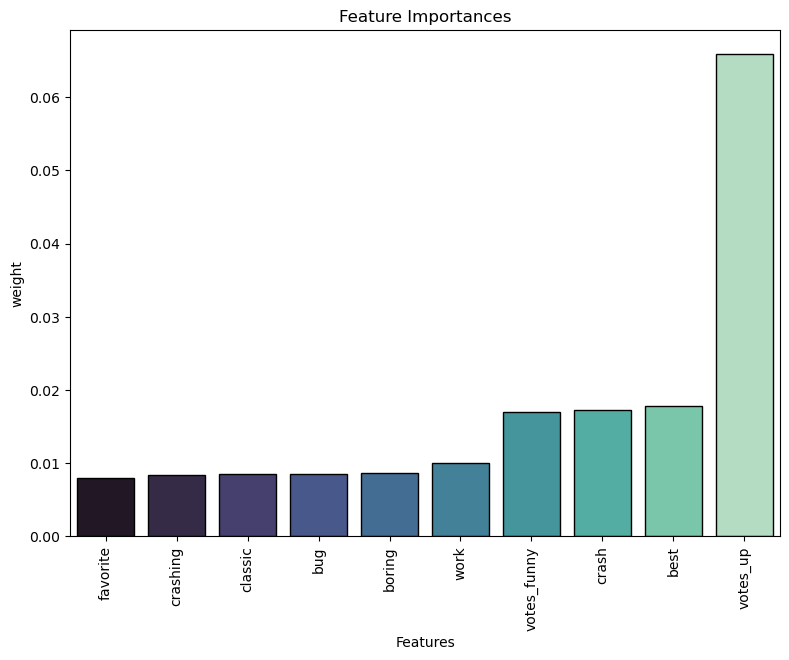

In [145]:
# top 5 and bottom 5 feature importances
fig, ax = plt.subplots(figsize = (8, 6))
sns.barplot(data = top10, x = "feature", y = "weight", edgecolor = "black", palette = "mako")
plt.title("Feature Importances")
plt.tight_layout()
plt.xlabel("Features")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show();

In [146]:
final_df

,steamid,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,language,review,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,review_preprocessed,joined_review_preprocessed
0,76561198274686747,236,22,5650,0,english,The best game of all time. Don't believe me? Play it and find out yourself!,1,0,0,0.000000,0,"[best, believe, play, find]",best believe play find
1,76561198330235225,78,2,2087,1681,english,i like that it is an open world game that you can for days,1,0,0,0.000000,0,"[open, world, day]",open world day
2,76561199165748096,33,5,523,518,english,"I fucking love this game, its one of my childhood games and one of my favourite games. Although fallout 4 is gameplay wise more fun with smoother combat, and personally I like the building and crafting system, but Fallout 3 has a better story in my opinion. Definitely get it, its a blast to play.",1,0,0,0.000000,0,"[fucking, love, childhood, favourite, although, gameplay, wise, smoother, combat, personally, building, crafting, system, better, story, opinion, definitely, blast, play]",fucking love childhood favourite although gameplay wise smoother combat personally building crafting system better story opinion definitely blast play
3,76561198213474099,38,2,1142,671,english,All time great!,1,0,0,0.000000,0,[great],great
4,76561198166525195,69,13,266,48,english,Uras,1,0,0,0.000000,0,[uras],uras
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194030,76561197974942528,343,7,3710,0,english,Loved this game when on ios platform. happy to play it again,1,7,2,0.398308,0,"[loved, platform, happy, play]",loved platform happy play
194031,76561198144517958,168,27,971,0,english,"Named my first vault vault 69, the other vault 420\nafter I gave everyone ghetto names\nthen I stopped playing",1,6,34,0.277916,0,"[named, first, vault, vault, vault, gave, everyone, ghetto, namesthen, stopped, playing]",named first vault vault vault gave everyone ghetto namesthen stopped playing
194032,76561198160969677,440,19,66,0,english,A F2P pile of shit that is laced in microtransactions that doesn't belong on Steam. We do not need these shit mobile ports. Stop releasing them!,0,44,3,0.290692,16,"[pile, shit, laced, microtransactions, belong, steam, need, shit, mobile, port, stop, releasing]",pile shit laced microtransactions belong steam need shit mobile port stop releasing
194033,76561198028220390,197,12,1217,0,english,Finally! Now I can put my nvidia geforce gtx 1060 to good use!,1,1,5,0.000000,0,"[finally, nvidia, geforce]",finally nvidia geforce


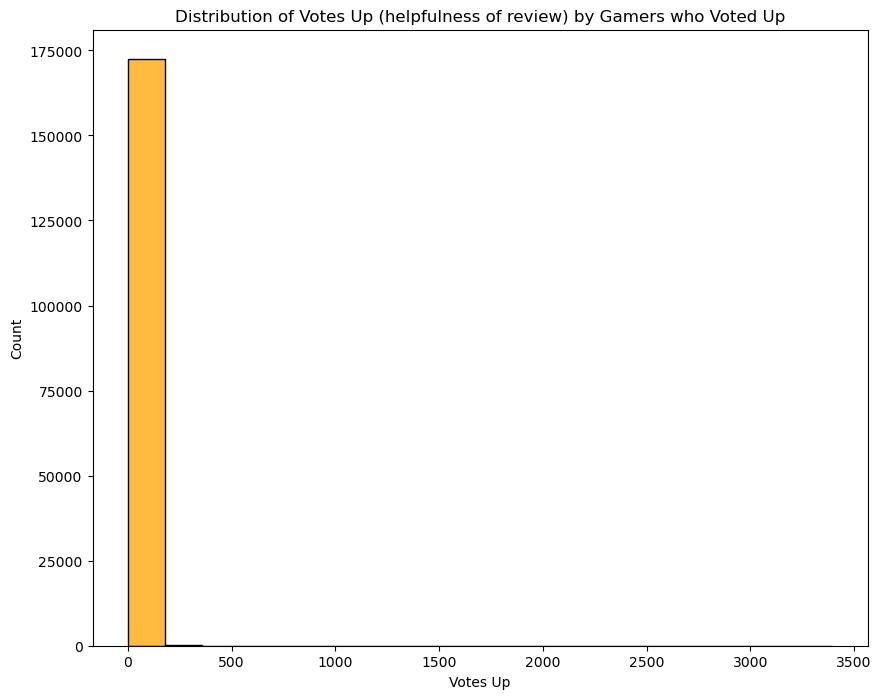

In [151]:
# distribution of votes_up by players who recommends the game

fig, ax = plt.subplots(figsize = (10, 8))
sns.histplot(data = votes_up, x = "votes_up", color = "orange")
plt.title("Distribution of Votes Up (helpfulness of review) by Gamers who Voted Up")
plt.xlabel("Votes Up")
plt.show();

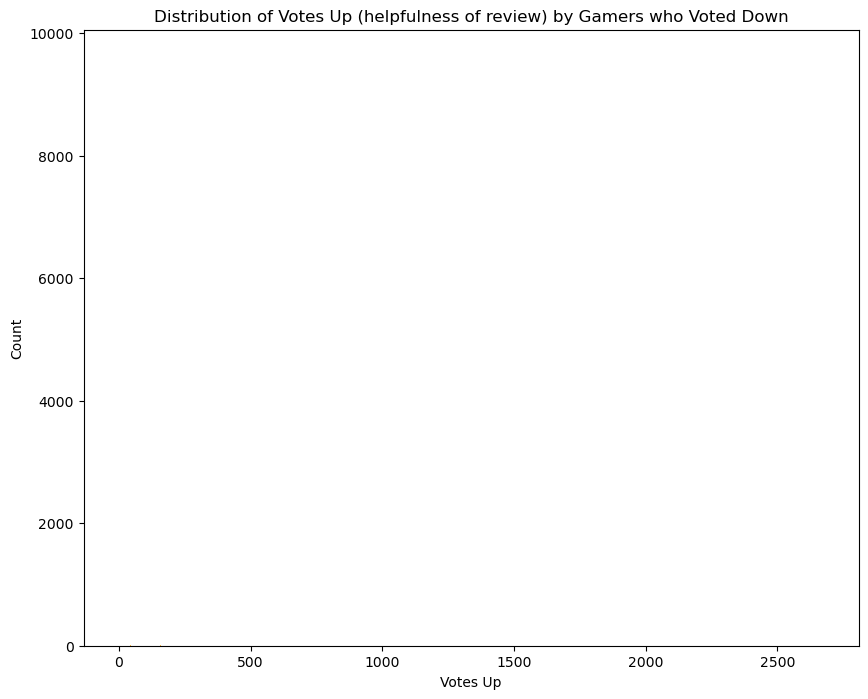

In [152]:
# distribution of votes_up by players who does not recommend the game

fig, ax = plt.subplots(figsize = (10, 8))
sns.histplot(data = votes_down, x = "votes_up", color = "orange")
plt.title("Distribution of Votes Up (helpfulness of review) by Gamers who Voted Down")
plt.xlabel("Votes Up")
plt.show();